In [1]:
#!pip install mofapy2 pandas scanpy scipy==1.9.2

In [2]:
import pandas as pd

df = pd.read_csv("combined_info.csv", index_col = 0)
df

,Metadata_wells,Metadata_wellnames,Metadata_treatments_x,Metadata_concentrations_x,Metadata_barcodes,Metadata_plate_x,Metadata_readsumsperwell,Metadata_readsumsperwellqcut,Metadata_logdose,Loc118273292,...,Nuclei_texture_variance_rna_10_02_256,Nuclei_texture_variance_rna_10_03_256,Nuclei_texture_variance_rna_3_00_256,Nuclei_texture_variance_rna_3_01_256,Nuclei_texture_variance_rna_3_02_256,Nuclei_texture_variance_rna_3_03_256,Nuclei_texture_variance_rna_5_00_256,Nuclei_texture_variance_rna_5_01_256,Nuclei_texture_variance_rna_5_02_256,Nuclei_texture_variance_rna_5_03_256
0,A1,A1_1,Thiazolodinone,100.000,TCGTACATAGCGCA,1,207512,"(1.94e+05,2.28e+05]",2.00000,0,...,1.09030,1.15630,1.26360,1.25940,1.26380,1.25810,1.26300,1.31520,1.26790,1.30930
1,A10,A10_1,BafilomycinA,0.100,ACGCCTGTTGGAGG,1,168456,"(1.57e+05,1.94e+05]",-1.00000,1,...,1.67500,1.83380,1.91390,1.91700,1.90650,1.92200,1.93850,2.02220,1.94030,2.00910
2,A11,A11_1,BafilomycinA,0.010,CAGTGGCCTAAGCA,1,137880,"(1.18e+05,1.57e+05]",-2.00000,0,...,1.54990,1.65090,1.80200,1.80790,1.79670,1.80170,1.82560,1.89710,1.82420,1.87710
3,A12,A12_1,BafilomycinA,0.001,TCTCCATTATACAG,1,213693,"(1.94e+05,2.28e+05]",-3.00000,0,...,1.40790,1.41050,1.69240,1.69430,1.68750,1.69720,1.71400,1.78220,1.71330,1.76800
4,A13,A13_1,FCCP,100.000,ACCGTCTTCCTTGC,1,7244,"(5.62e+03,6.82e+04]",2.00000,0,...,1.42970,1.36520,2.12790,2.15470,2.12170,2.13700,2.16030,2.32130,2.18840,2.24230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,P5,P5_1,Colchicine,0.010,ACCGGTCGTTCTGC,1,9143,"(5.62e+03,6.82e+04]",-2.00000,0,...,0.84369,0.83246,0.96432,0.96335,0.96529,0.96582,0.97151,0.99121,0.97208,0.99567
379,P6,P6_1,Colchicine,0.001,TCTAGACACTATCG,1,267395,"(2.6e+05,3.15e+05]",-3.00000,1,...,0.93497,0.91396,1.08620,1.08710,1.08820,1.08970,1.09450,1.12320,1.09700,1.12370
380,P7,P7_1,Fenbutatinoxide,50.000,CATTAAGGTATCGC,1,6783,"(5.62e+03,6.82e+04]",1.69897,0,...,2.38630,2.50880,2.71800,2.72550,2.69830,2.72720,2.74840,2.88460,2.76200,2.85000
381,P8,P8_1,Fenbutatinoxide,10.000,TCAATGGCAGGCCG,1,304217,"(2.6e+05,3.15e+05]",1.00000,0,...,1.27570,1.29320,1.54190,1.54210,1.53630,1.53840,1.55320,1.60850,1.55700,1.59020


In [3]:
background_cols = [col for col in df.columns if "backgroundonly" in col]
df.drop(columns = background_cols, inplace = True)

In [4]:
import scanpy as sc
import anndata
# Select gene count columns
df.columns = [x.replace("_x", "") for x in df.columns]

metadata_columns = [col for col in df.columns if col.startswith('Metadata')]

# Select metadata columns
gene_columns = [col for col in df.columns if col.startswith('Loc')]
picasso_columns = [col for col in df.columns if not col.startswith('Loc') and not col.startswith('Metadata') ]
combined_data_cols = gene_columns + picasso_columns

source_col = ["RNA"] * len(gene_columns) + ["CP"] * len(picasso_columns)
processing_col = ["Raw"] * len(gene_columns) + ["Feature extraction"] * len(picasso_columns)

var_df = pd.DataFrame({
    "Metadata_source": source_col,
    "Metadata_processing": processing_col
})

print(metadata_columns)
print(gene_columns)
print(picasso_columns)

['Metadata_wells', 'Metadata_wellnames', 'Metadata_treatments', 'Metadata_concentrations', 'Metadata_barcodes', 'Metadata_plate', 'Metadata_readsumsperwell', 'Metadata_readsumsperwellqcut', 'Metadata_logdose', 'Metadata_treatments_y', 'Metadata_concentrations_y', 'Metadata_plate_y', 'Metadata_site_count', 'Metadata_count_cells', 'Metadata_count_cellsincludingedges', 'Metadata_count_cytoplasm', 'Metadata_count_nuclei', 'Metadata_count_nucleiincludingedges', 'Metadata_object_count']
['Loc118273292', 'Loc126911541', 'Loc126911537', 'Loc118273263', 'Loc118273262', 'Loc118273265', 'Loc118273264', 'Loc118273712', 'Loc118273291', 'Loc126910974', 'Loc118273142', 'Loc118273450', 'Loc118273633', 'Loc126910980', 'Loc118273433', 'Loc118273533', 'Loc118273279', 'Loc118273034', 'Loc118273035', 'Loc118273036', 'Loc118273490', 'Loc118266984', 'Loc118273650', 'Loc118273424', 'Loc118273280', 'Loc118273445', 'Loc118273031', 'Loc118273030', 'Loc118273028', 'Loc118273027', 'Loc126910870', 'Loc118273145', '

In [5]:
# Create an AnnData object
adata = anndata.AnnData(
    X=df[gene_columns + picasso_columns].values,
    obs = df[metadata_columns],
    var = var_df
)
adata
sc.write('PicassoXBridge.h5ad', adata)



/tmp/ipykernel_2482/1045914659.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
from importlib_metadata import version; print(version("importlib_metadata"))
from importlib_metadata import version; print(version("umap-learn"))

7.1.0
0.5.5


In [7]:
#!pip install --upgrade importlib-metadata 
#!pip install --upgrade umap-learn 


/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


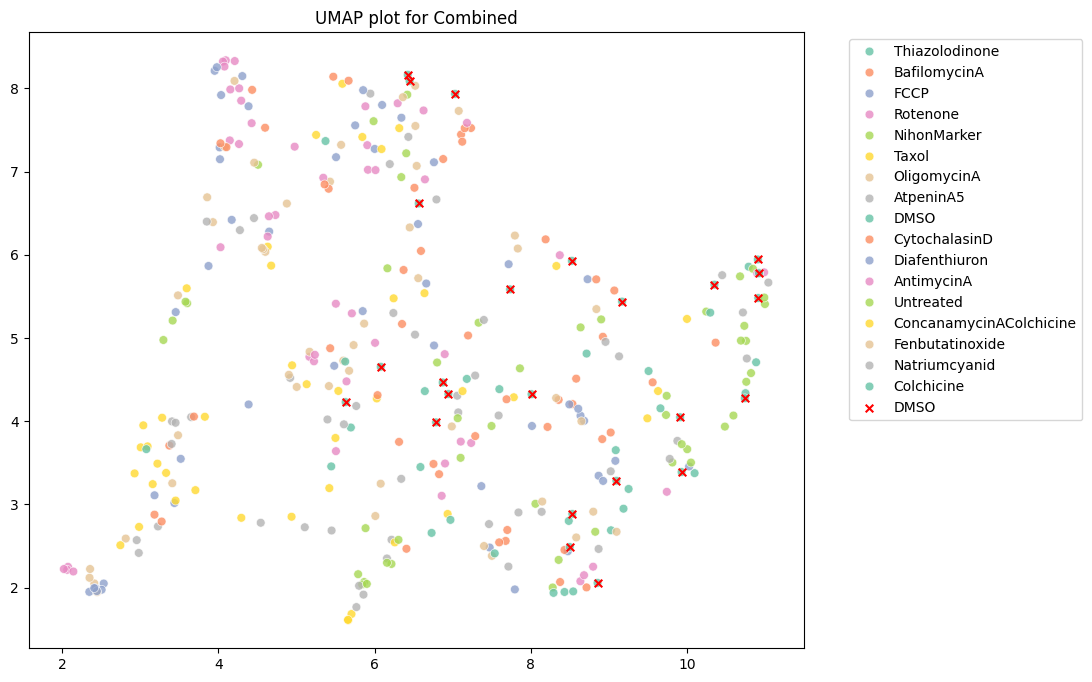

In [8]:
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.decomposition import PCA
import seaborn as sns

def plot_scanpy(df, colouring, kind = "pca", data_source = "RNA"):
    # Assuming adata is your AnnData object
    feat_cols = [ col for col in df.columns if not col.startswith('Metadata') ]
    reducer = UMAP(n_components=2, random_state = 42) if kind == "umap" else PCA(n_components=2)
    embedding = reducer.fit_transform(df[feat_cols])
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=df["Metadata_treatments"],
        palette="Set2",
        alpha=0.8,
        s=40,
        ax = ax
    )
    ax.scatter(
        embedding[df['Metadata_treatments'] == 'DMSO'][:, 0],
        embedding[df['Metadata_treatments'] == 'DMSO'][:, 1],
        s=30,
        c='red',
        marker='x',
        label='DMSO')
    plt.title(f"{kind.upper()} plot for {data_source}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()
    return
plot_scanpy(df, "Metadata_treatments", "umap", "Combined")


In [9]:
#!pip install --upgrade mofapy2

In [10]:
df["Metadata_treatments"].value_counts()

remove_treatments = [
    "ConcanamycinAColchicine",
    "Colchicine",
    "Untreated"
]
df = df[~df["Metadata_treatments"].isin(remove_treatments)]
print(df["Metadata_treatments"].value_counts())


Thiazolodinone     24
BafilomycinA       24
FCCP               24
Rotenone           24
NihonMarker        24
Taxol              24
OligomycinA        24
AtpeninA5          24
DMSO               24
CytochalasinD      24
Diafenthiuron      24
AntimycinA         24
Fenbutatinoxide    24
Natriumcyanid      24
Name: Metadata_treatments, dtype: int64


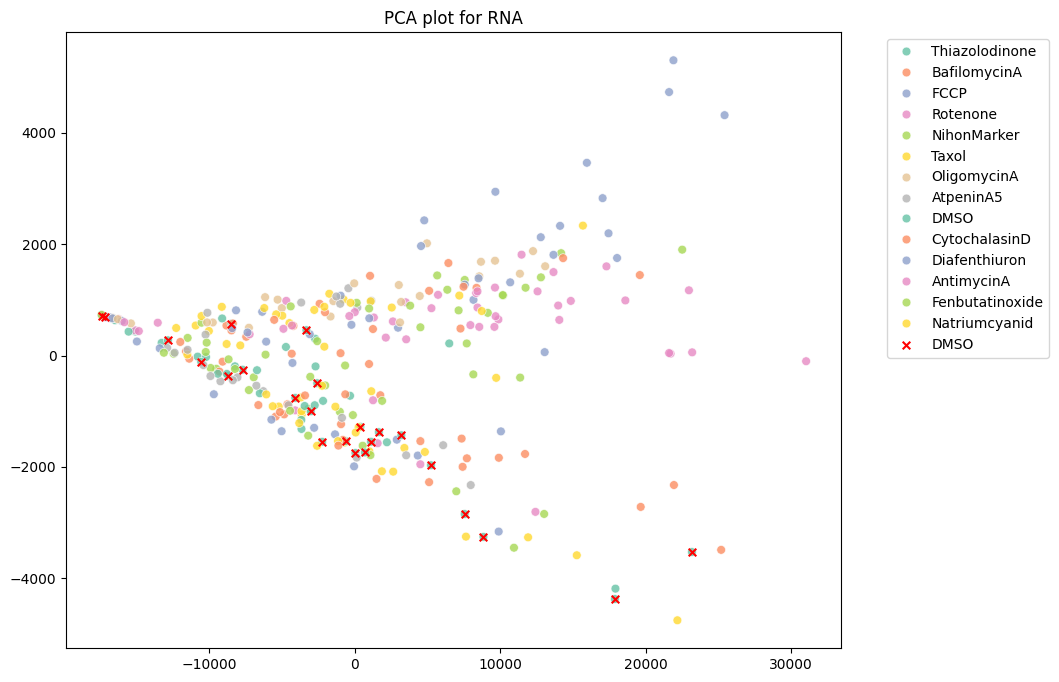

/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


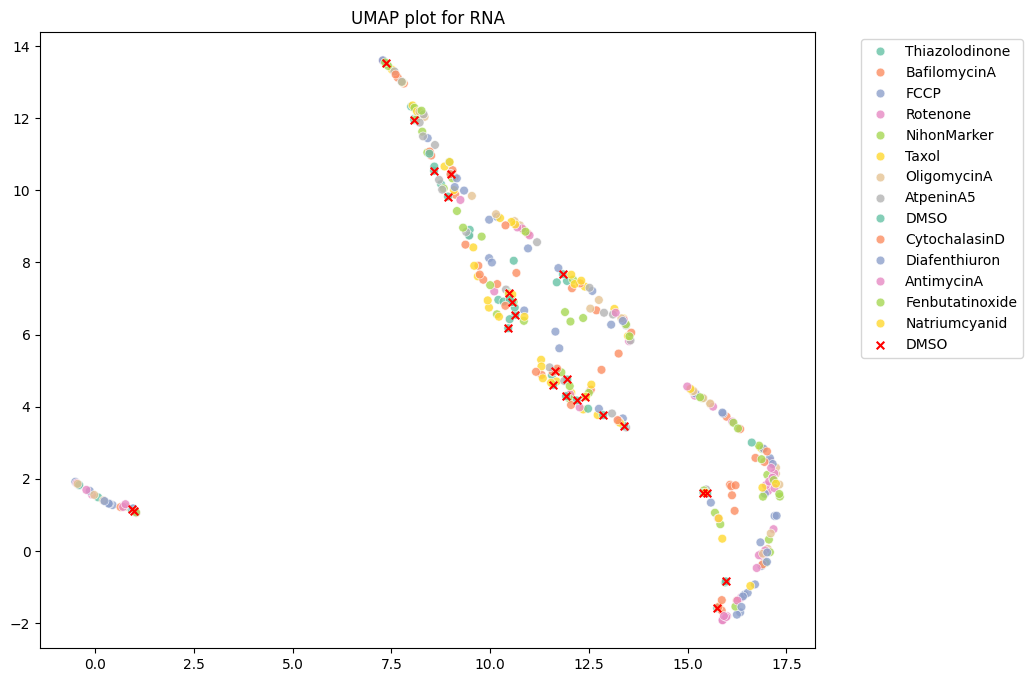

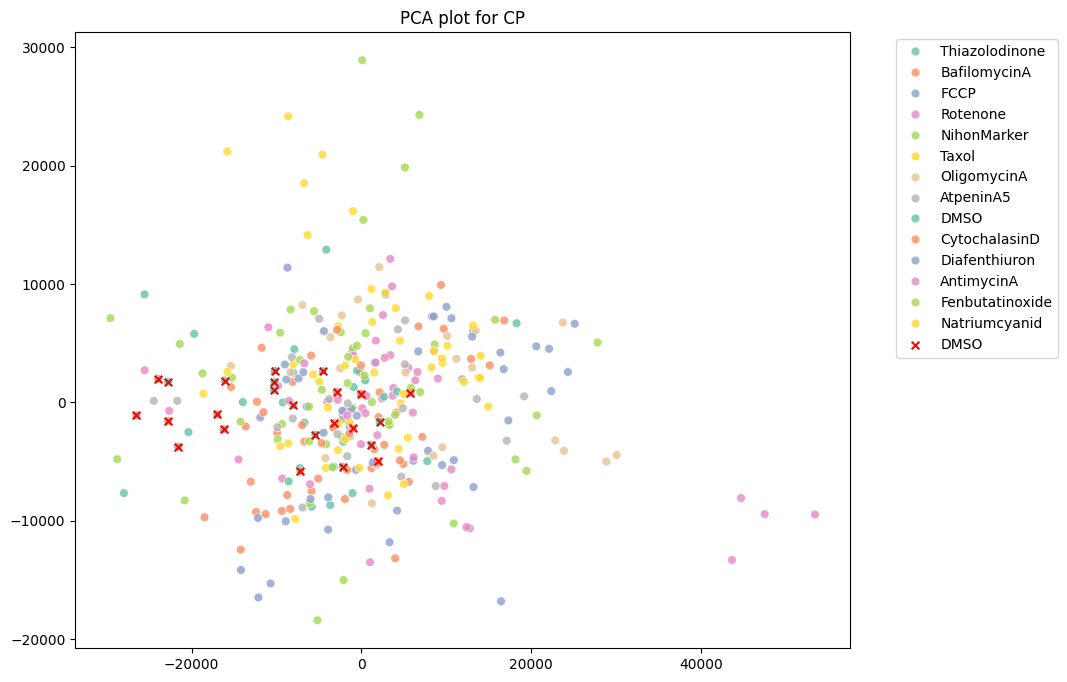

/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


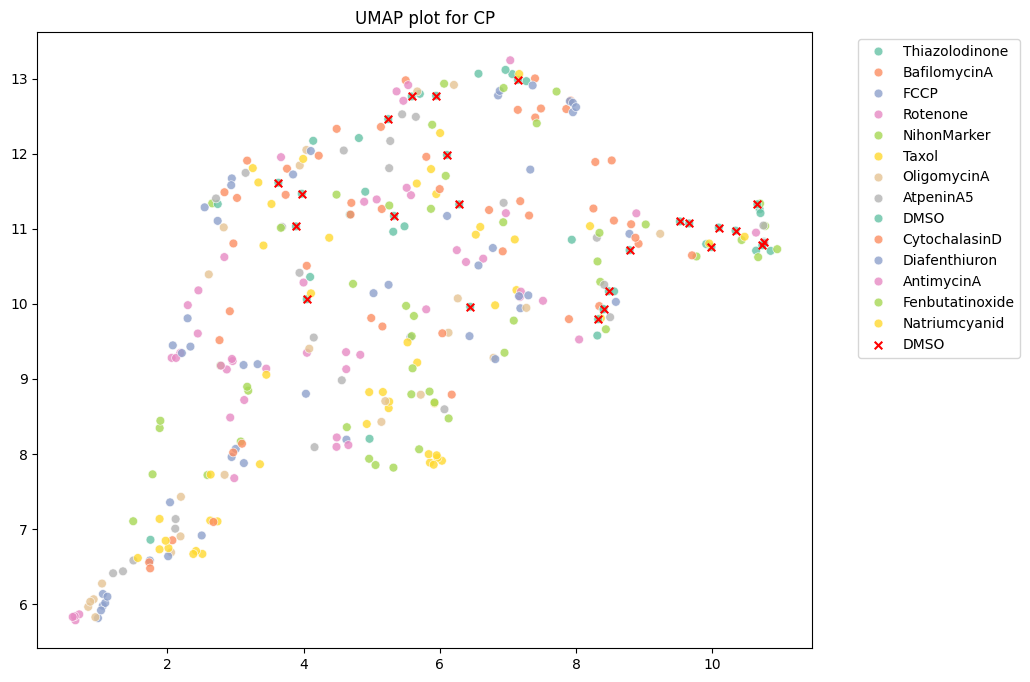

,sample,group,feature,value,view
0,A1,Thiazolodinone,Loc118273292,0.00000,RNA
1,A10,BafilomycinA,Loc118273292,1.00000,RNA
2,A11,BafilomycinA,Loc118273292,0.00000,RNA
3,A12,BafilomycinA,Loc118273292,0.00000,RNA
4,A13,FCCP,Loc118273292,0.00000,RNA
...,...,...,...,...,...
1764331,P17,Natriumcyanid,Nuclei_texture_variance_rna_5_03_256,0.91575,CP
1764332,P18,Natriumcyanid,Nuclei_texture_variance_rna_5_03_256,0.98663,CP
1764333,P7,Fenbutatinoxide,Nuclei_texture_variance_rna_5_03_256,2.85000,CP
1764334,P8,Fenbutatinoxide,Nuclei_texture_variance_rna_5_03_256,1.59020,CP


In [11]:
import scanpy.external as sce

## Load data ##
###############

#A pandas data.frame with columns sample, group, feature, view, value. This is the most intuitive format, as it summarises all omics/groups in a single data structure. Also, there is no need to add rows that correspond to missing data.

#For example:

#sample   group   feature    value   view
#sample1  groupA  gene1      2.8044  RNA
#sample1  groupA  gene3      2.2069  RNA
#sample2  groupB  gene2      0.1454  RNA
#sample2  groupB  gene1      2.7021  RNA
#sample2  groupB  promoter1  3.8618  Methylation
#sample3  groupB  promoter2  3.2545  Methylation
#sample3  groupB  promoter3  1.5014  Methylation

# The input needs to be a data.frame with columns ["sample","feature","view","group","value"]
    

def transform4mofa(df, feature_cols, data_source, normalize=False):
    if data_source == "RNA" and normalize:
    
        adata = anndata.AnnData(X=df[feature_cols])
        sc.pp.filter_genes(adata, min_counts=10)
        #sce.pp.magic(adata, knn=5)
        sc.pp.normalize_total(
            adata,
            #target_sum=1,
            # exclude_highly_expressed=True,
            # max_fraction=0.2,
            inplace=True
        )
        #sc.pp.log1p(adata)
        df_tmp = adata.to_df()
        column_sums = df_tmp.sum()

        # Get the column names with non-zero sum
        non_zero_sum_columns = column_sums[column_sums != 0].index

        # Select only the columns with non-zero sum
        df_tmp = df_tmp[non_zero_sum_columns]  

        df_tmp["Metadata_treatments"] = list(df["Metadata_treatments"])
        df_tmp["Metadata_wells"] = list(df["Metadata_wells"])
        
    else:
        df_tmp = df[feature_cols + ["Metadata_treatments", "Metadata_wells"]]
    
    plot_scanpy(df_tmp, "Metadata_treatments", "pca", data_source)
    plot_scanpy(df_tmp, "Metadata_treatments", "umap", data_source)
    if "PC1" in df_tmp.columns:
        df_tmp = df_tmp.drop(columns = ['PC1', 'PC2'])
    #df_gene = df_gene.set_index("Metadata_wells")
    melted_table = df_tmp.melt(id_vars=['Metadata_wells', 'Metadata_treatments'], var_name='feature', value_name='value')
    melted_table.rename(columns = 
        {
            "Metadata_wells": "sample",
            "Metadata_treatments": "group"
        },
        inplace = True)
    melted_table["view"] = data_source
    return(melted_table)

data = pd.concat(
    [
        transform4mofa(
            df.copy(),
            gene_columns,
            "RNA",
            #True     #UNCOMMENT FOR NORMALIZED DATA
        ),
        transform4mofa(
            df.copy(),
            picasso_columns,
            "CP")
    ],
    axis = 0
)
display(data)

In [12]:
######################################################
## Template script to train a MOFA+ model in Python ##
######################################################

from mofapy2.run.entry_point import entry_point
import pandas as pd
import io

###############

In [13]:
###########################
## Initialise MOFA model ##
###########################

## (1) initialise the entry point
ent = entry_point()

## (2) Set data options
# - scale_views: if views have very different ranges, one can to scale each view to unit variance
ent.set_data_options(
	scale_views = True
)

# (3) Set data using the data frame format
ent.set_data_df(data)

# using default values
ent.set_model_options()

# using personalised values
ent.set_model_options(
	factors = 10, 
	spikeslab_weights = True, 
	ard_weights = True
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Scaling views to unit variance...



Loaded group='AntimycinA' view='CP' with N=24 samples and D=5251 features...
Loaded group='AntimycinA' view='RNA' with N=24 samples and D=16239 features...
Loaded group='AtpeninA5' view='CP' with N=24 samples and D=5251 features...
Loaded group='AtpeninA5' view='RNA' with N=24 samples and D=16239 features...
Loaded group='BafilomycinA' view='

In [14]:

## (5) Set training options ##
# - iter: number of iterations
# - convergence_mode: "fast", "medium", "slow". Fast mode is usually good enough.
# - dropR2: minimum variance explained criteria to drop factors while training. Default is None, inactive factors are not dropped during training
# - gpu_mode: use GPU mode? this functionality needs cupy installed and a functional GPU, see https://biofam.github.io/MOFA2/gpu_training.html
# - seed: random seed

# using default values
ent.set_train_options()

# using personalised values
ent.set_train_options(
	iter = 100, 
	convergence_mode = "medium", 
	dropR2 = None, 
	gpu_mode = False, 
	seed = 42
)


In [15]:
#!pip install --upgrade scipy

# If you encounter: AttributeError: Module 'scipy' has no attribute 'shape'

This is the workaround from github: 

Change s.shape to np.shape in the mofapy2/core/distributions/basic_distributions.py file and s.outer to np.outer in the mofapy2/core/BayesNet.py files.

Additionally I had to change s.outer to np.outer ./core/BayesNet.py

also had to swap s.mod to np.mod in ./core/nodes/nongaussian_nodes.py

Generall itll complain about one thing or another not being available in scipy. I go through the root of mofapy then run:

find . "*.py" -exec grep -H s.mod {} \;



In [16]:
####################################
## Build and train the MOFA model ##
####################################

# Build the model 
ent.build()

# Run the model
ent.run()




######################################
## Training the model with seed 42 ##
######################################


ELBO before training: -359463231.29 

Iteration 1: time=2.39, ELBO=-21391877.49, deltaELBO=338071353.795 (94.04893863%), Factors=10
Iteration 2: time=2.78, ELBO=-2811072.06, deltaELBO=18580805.437 (5.16904201%), Factors=10
Iteration 3: time=2.94, ELBO=5689777.44, deltaELBO=8500849.497 (2.36487317%), Factors=10
Iteration 4: time=2.90, ELBO=11785321.99, deltaELBO=6095544.554 (1.69573520%), Factors=10
Iteration 5: time=2.82, ELBO=16614828.74, deltaELBO=4829506.750 (1.34353289%), Factors=10
Iteration 6: time=3.00, ELBO=20663113.73, deltaELBO=4048284.991 (1.12620280%), Factors=10
Iteration 7: time=2.65, ELBO=24185852.99, deltaELBO=3522739.259 (0.97999989%), Factors=10
Iteration 8: time=2.75, ELBO=27342586.60, deltaELBO=3156733.610 (0.87817983%), Factors=10
Iteration 9: time=2.96, ELBO=30246785.53, deltaELBO=2904198.932 (0.80792656%), Factors=10
Iteration 10: time=2.83, ELB

Iteration 46: time=2.90, ELBO=95839661.25, deltaELBO=1119932.367 (0.31155686%), Factors=10
Iteration 47: time=2.84, ELBO=96934947.59, deltaELBO=1095286.341 (0.30470052%), Factors=10
Iteration 48: time=2.79, ELBO=98006337.94, deltaELBO=1071390.345 (0.29805283%), Factors=10
Iteration 49: time=2.84, ELBO=99054539.97, deltaELBO=1048202.035 (0.29160202%), Factors=10
Iteration 50: time=2.83, ELBO=100183192.09, deltaELBO=1128652.121 (0.31398263%), Factors=10
Iteration 51: time=2.89, ELBO=101195179.22, deltaELBO=1011987.130 (0.28152730%), Factors=10
Iteration 52: time=2.82, ELBO=102179379.13, deltaELBO=984199.907 (0.27379710%), Factors=10
Iteration 53: time=2.81, ELBO=103141691.99, deltaELBO=962312.862 (0.26770829%), Factors=10
Iteration 54: time=2.78, ELBO=104083661.32, deltaELBO=941969.324 (0.26204887%), Factors=10
Iteration 55: time=2.83, ELBO=105006078.55, deltaELBO=922417.232 (0.25660962%), Factors=10
Iteration 56: time=2.82, ELBO=105909550.15, deltaELBO=903471.605 (0.25133909%), Factors=

In [17]:
####################
## Save the model ##
####################

outfile = "PicassoXBridge4Mofa2.hdf5"

# - save_data: logical indicating whether to save the training data in the hdf5 file.
# this is useful for some downstream analysis in R, but it can take a lot of disk space.
ent.save(outfile, save_data=True)

Saving model in PicassoXBridge4Mofa2.hdf5...


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

In [19]:
import mofax as mfx
#m = ent
m = mfx.mofa_model("PicassoXBridge4Mofa2.hdf5")
#m = mfx.mofa_model(ent)

In [20]:
print(f"""\
    Cells: {m.shape[0]}
    Features: {m.shape[1]}
    Groups of cells: {', '.join(m.groups)}
    Views: {', '.join(m.views)}
""")

    Cells: 336
    Features: 21490
    Groups of cells: AntimycinA, AtpeninA5, BafilomycinA, CytochalasinD, DMSO, Diafenthiuron, FCCP, Fenbutatinoxide, Natriumcyanid, NihonMarker, OligomycinA, Rotenone, Taxol, Thiazolodinone
    Views: CP, RNA



<Figure size 3000x3000 with 0 Axes>

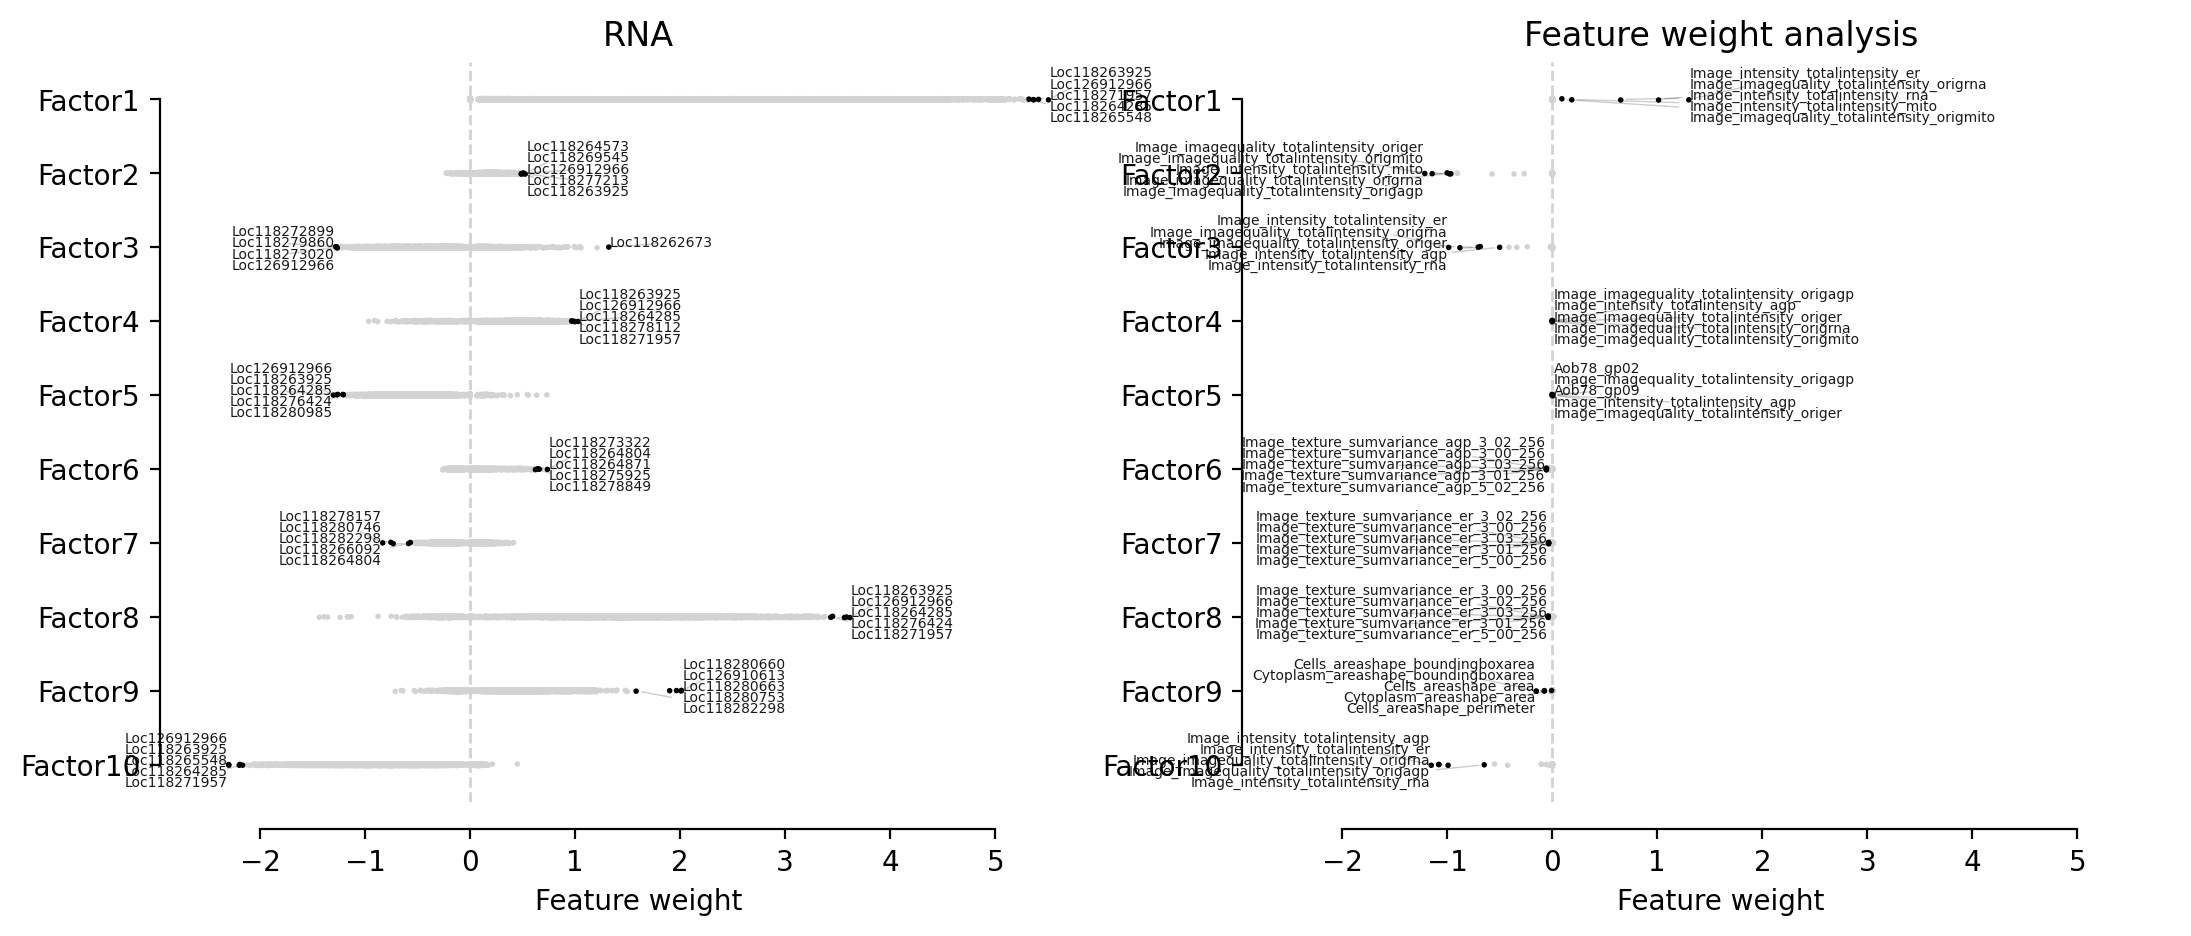

In [46]:
plt.figure(figsize=(15,15))

ax = mfx.plot_weights(
    m,
    factor=2,
    n_features=5,
    #y_repel_coef=0.1, 
    #x_rank_offset=-150
)
ax.set_title("Feature weight analysis")

plt.savefig("feature_weights.png")
# repel coefficient and offsets can be useful to move labels around
# and there are x_rank_offset and x_rank_offset_neg for positive and negative weights respectively

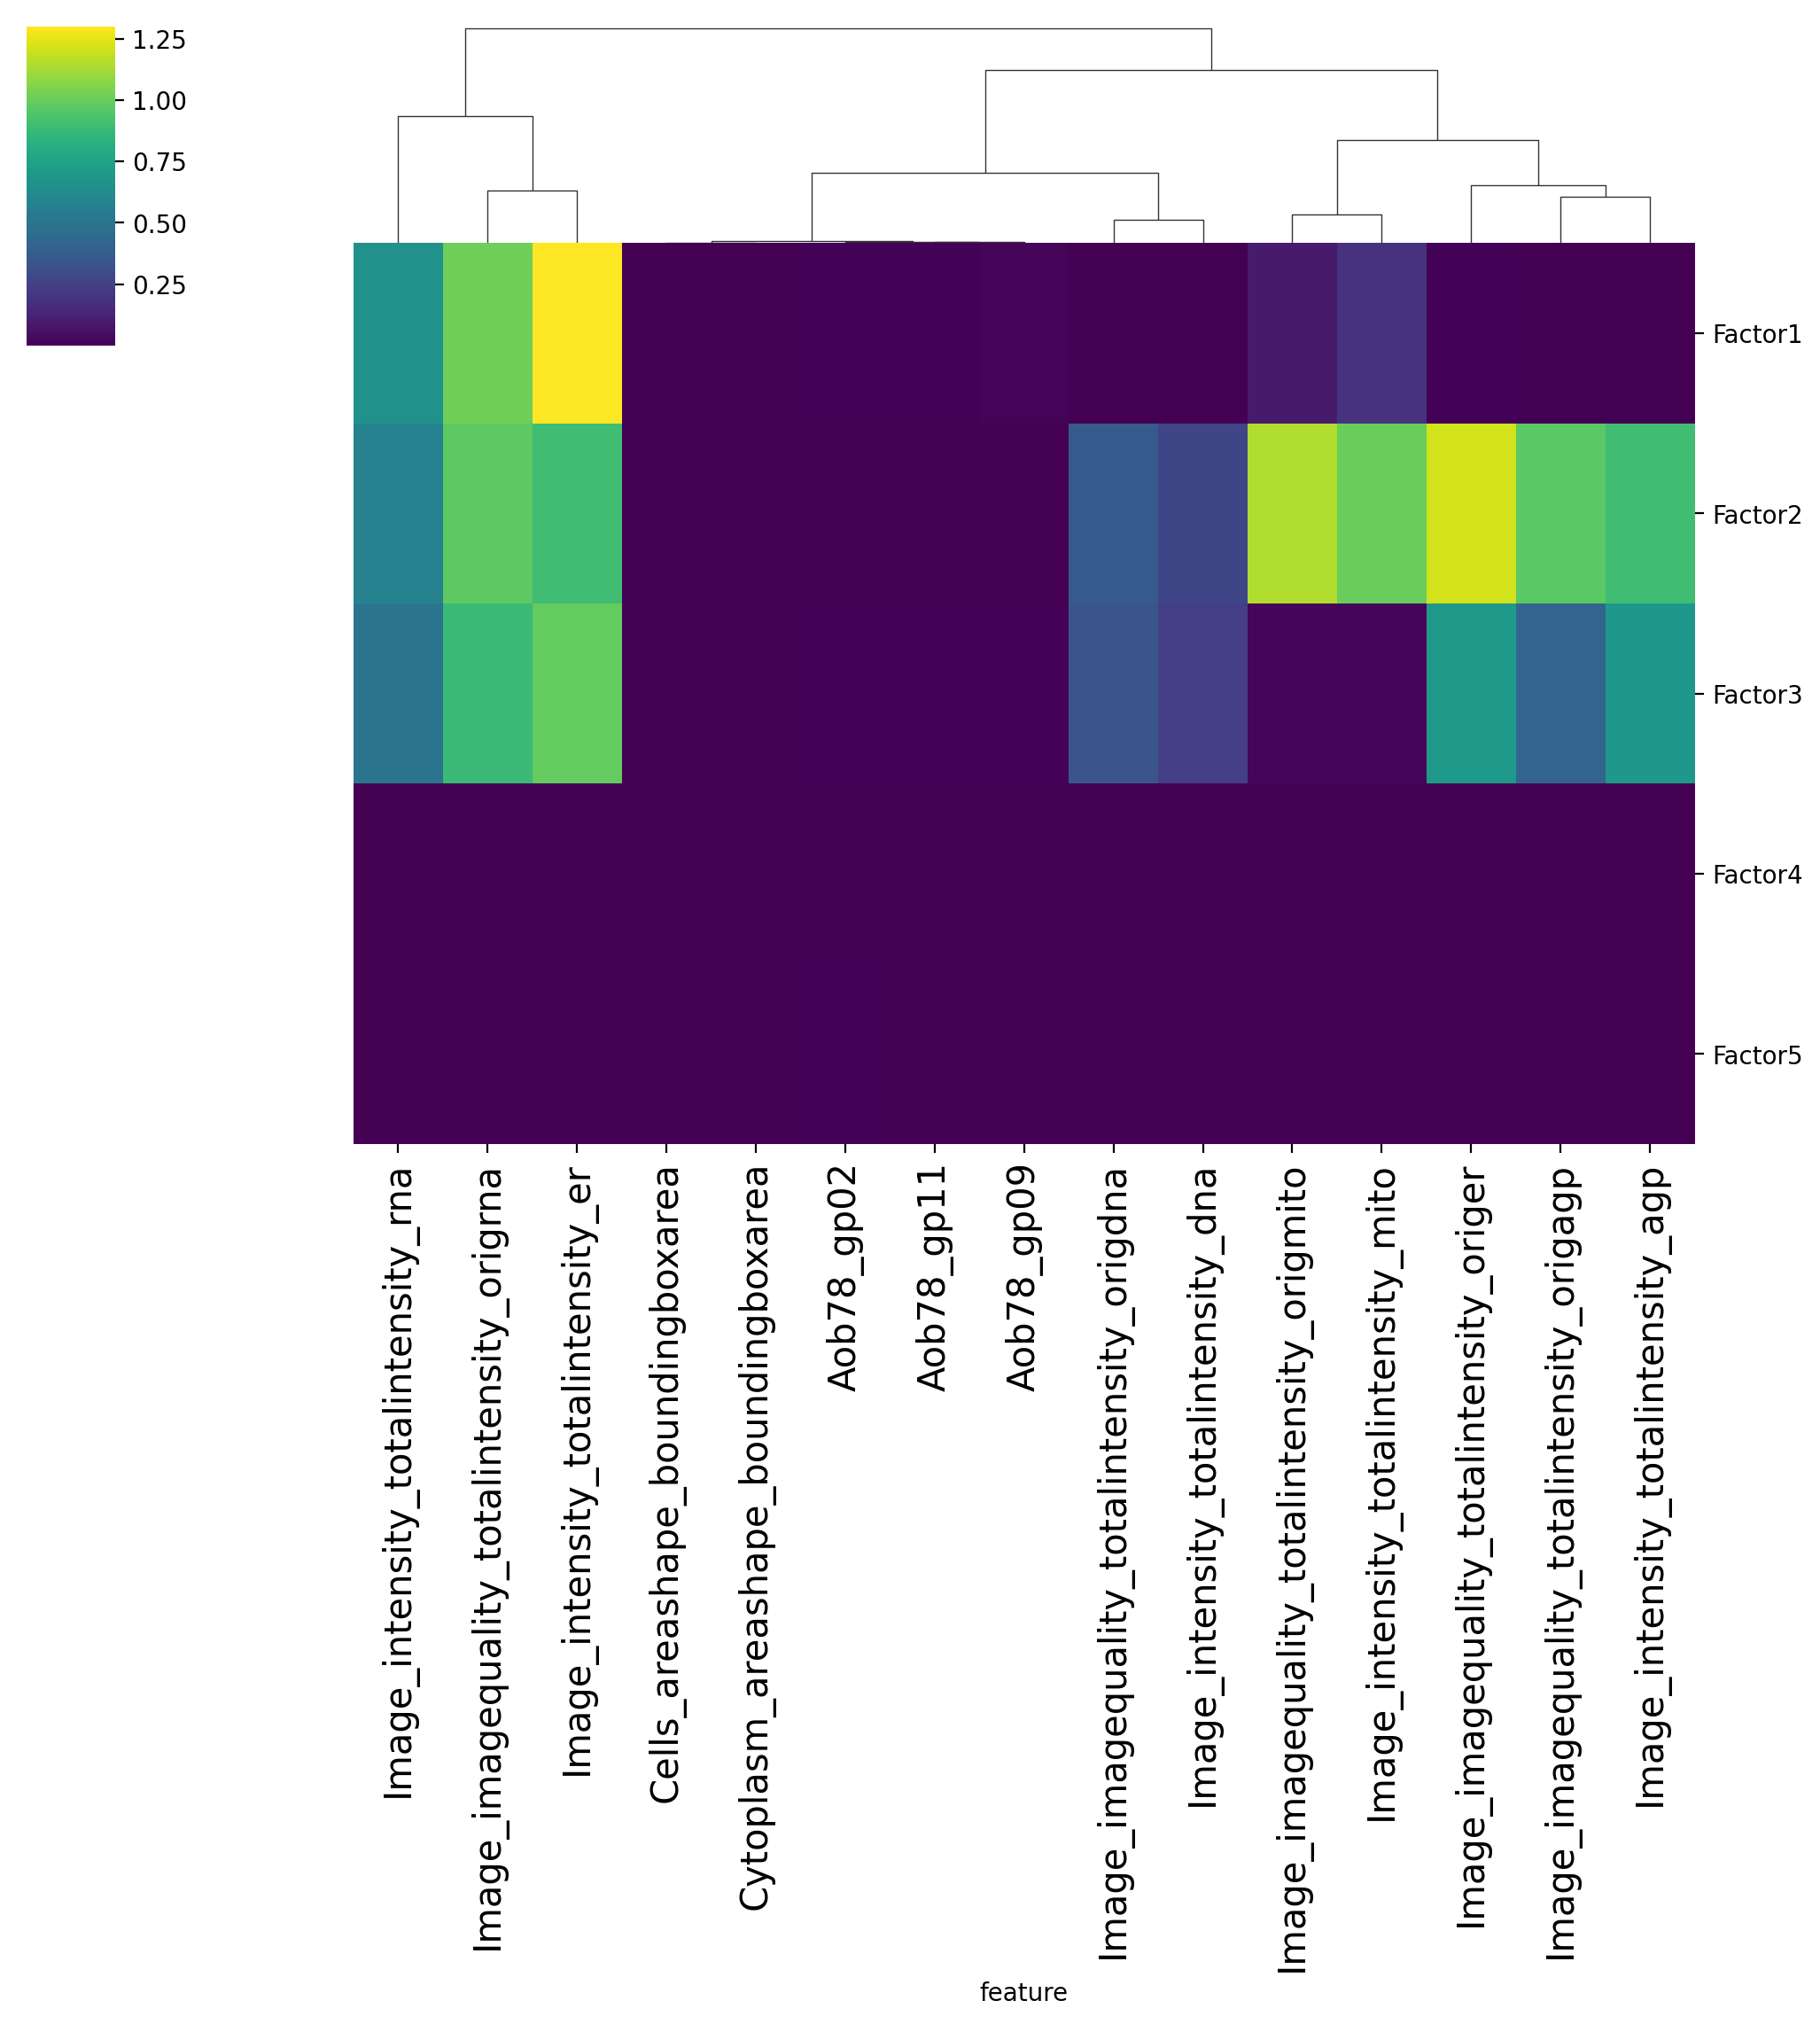

In [47]:
mfx.plot_weights_heatmap(
    m,
    n_features=10,
    factors=range(0, 5), 
    xticklabels_size=15,
    w_abs=True,
    cmap="viridis", 
    cluster_factors=False)

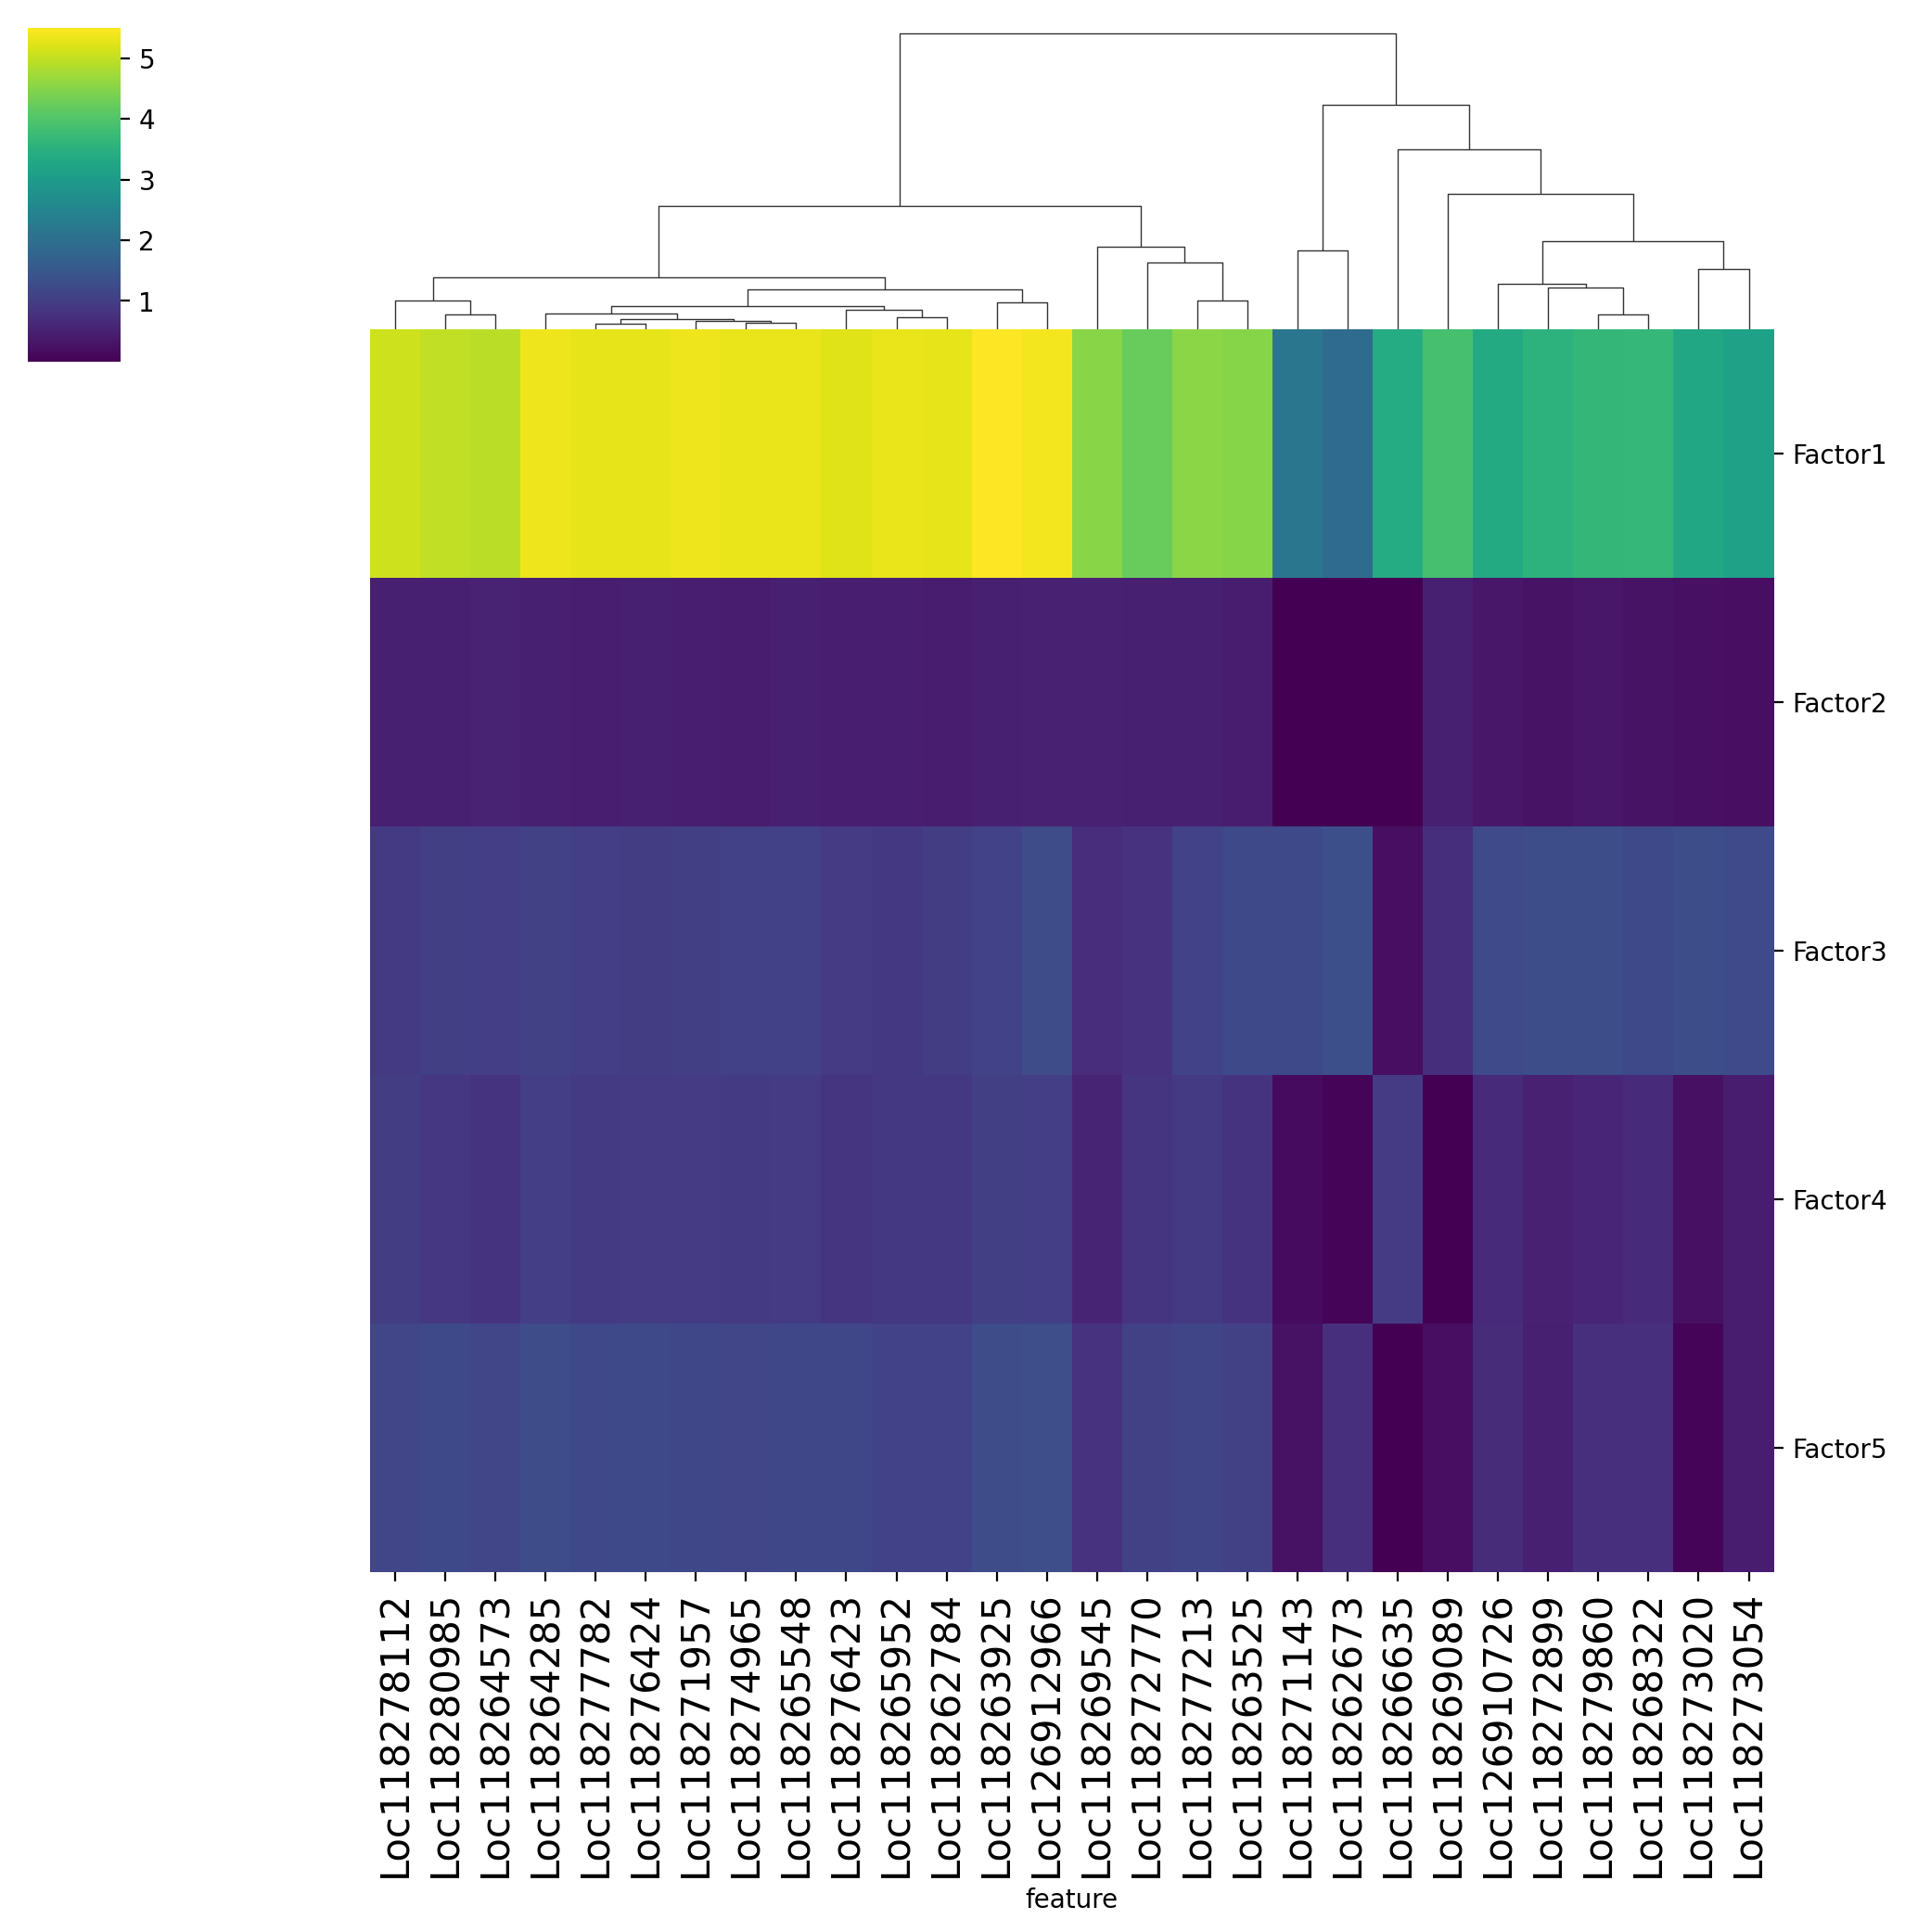

In [48]:
mfx.plot_weights_heatmap(
    m,
    n_features=10,
    view = "RNA",
    factors=range(0, 5), 
    xticklabels_size=15,
    w_abs=True,
    cmap="viridis", 
    cluster_factors=False)

<Axes: title={'center': 'CP'}, xlabel='factor', ylabel='feature'>

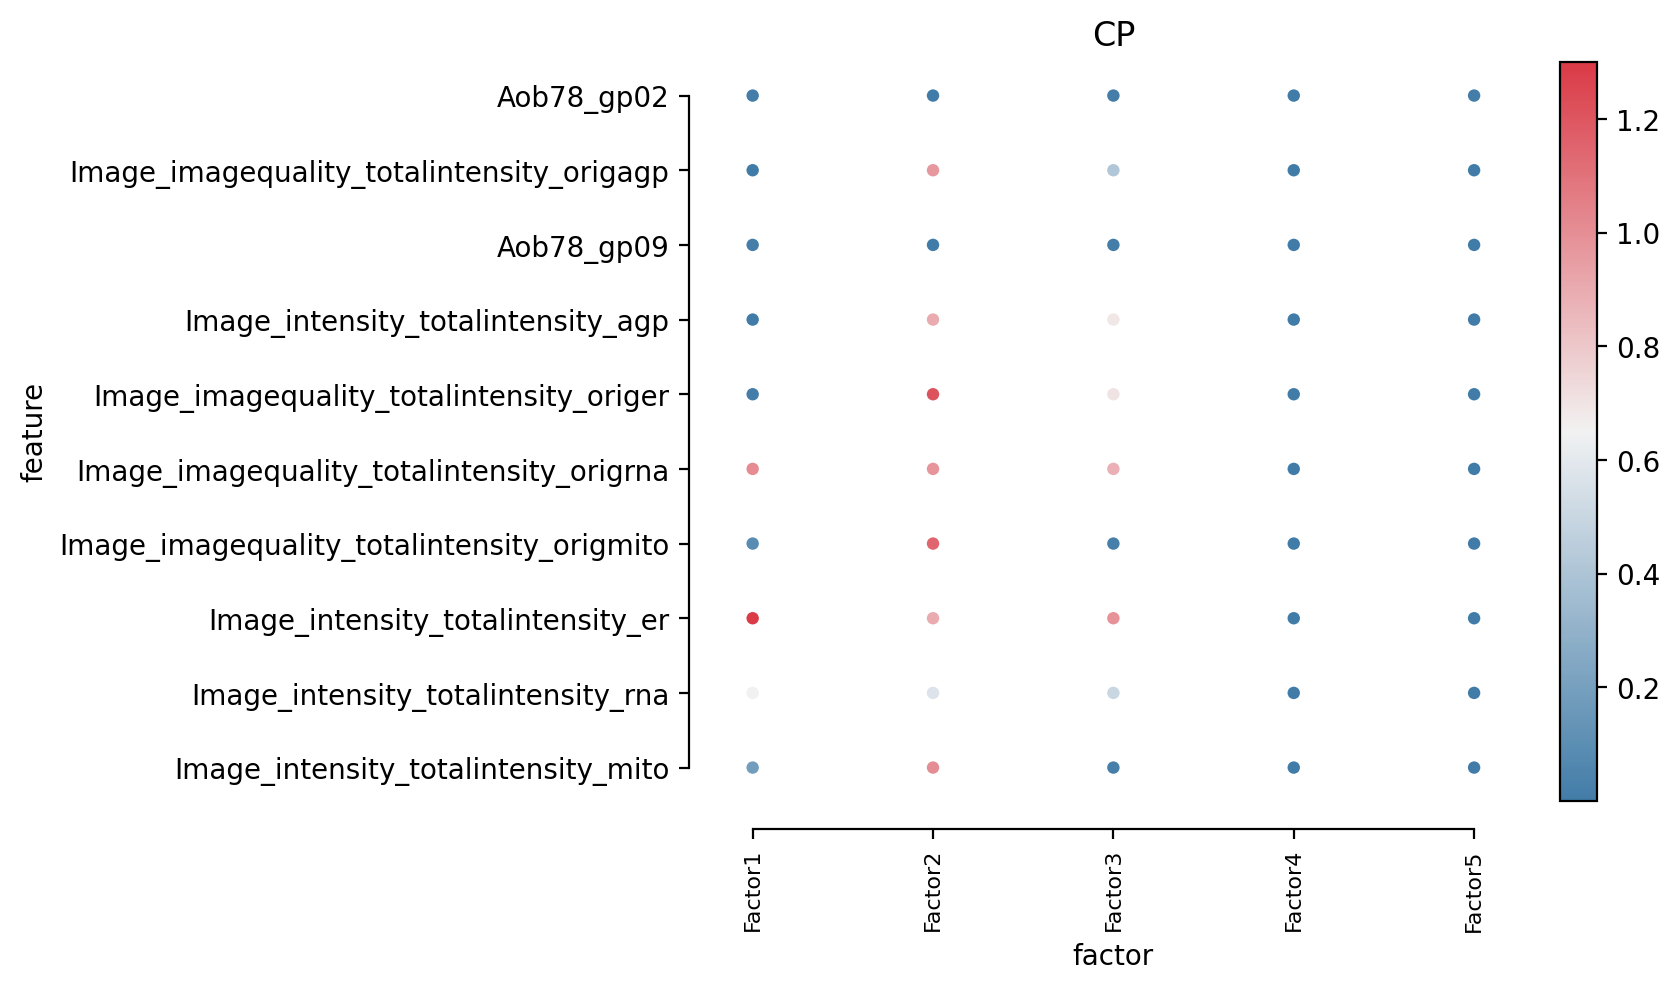

In [42]:
mfx.plot_weights_dotplot(
    m,
    n_features=5, 
    w_abs=True, 
    factors=list(range(5)),
    view = "CP",
    #col_wrap=4,
    yticklabels_size=15)

<Axes: title={'center': 'RNA'}, xlabel='factor', ylabel='feature'>

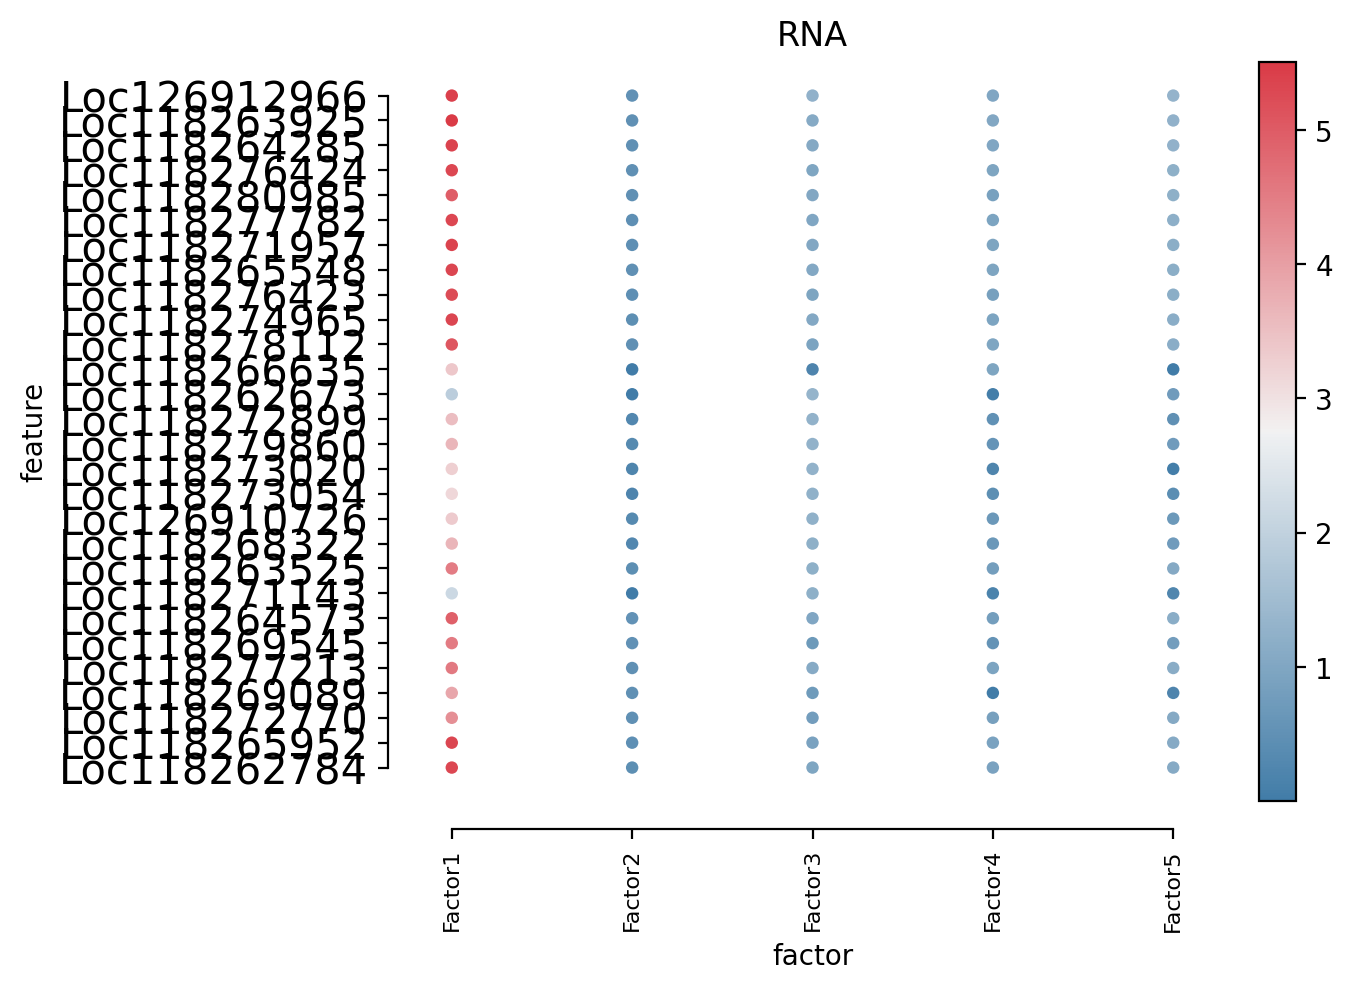

In [43]:
mfx.plot_weights_dotplot(
    m,
    n_features=10, 
    w_abs=True, 
    factors=list(range(5)),
    view = "RNA",
    #col_wrap=4,
    yticklabels_size=15)

<Axes: >

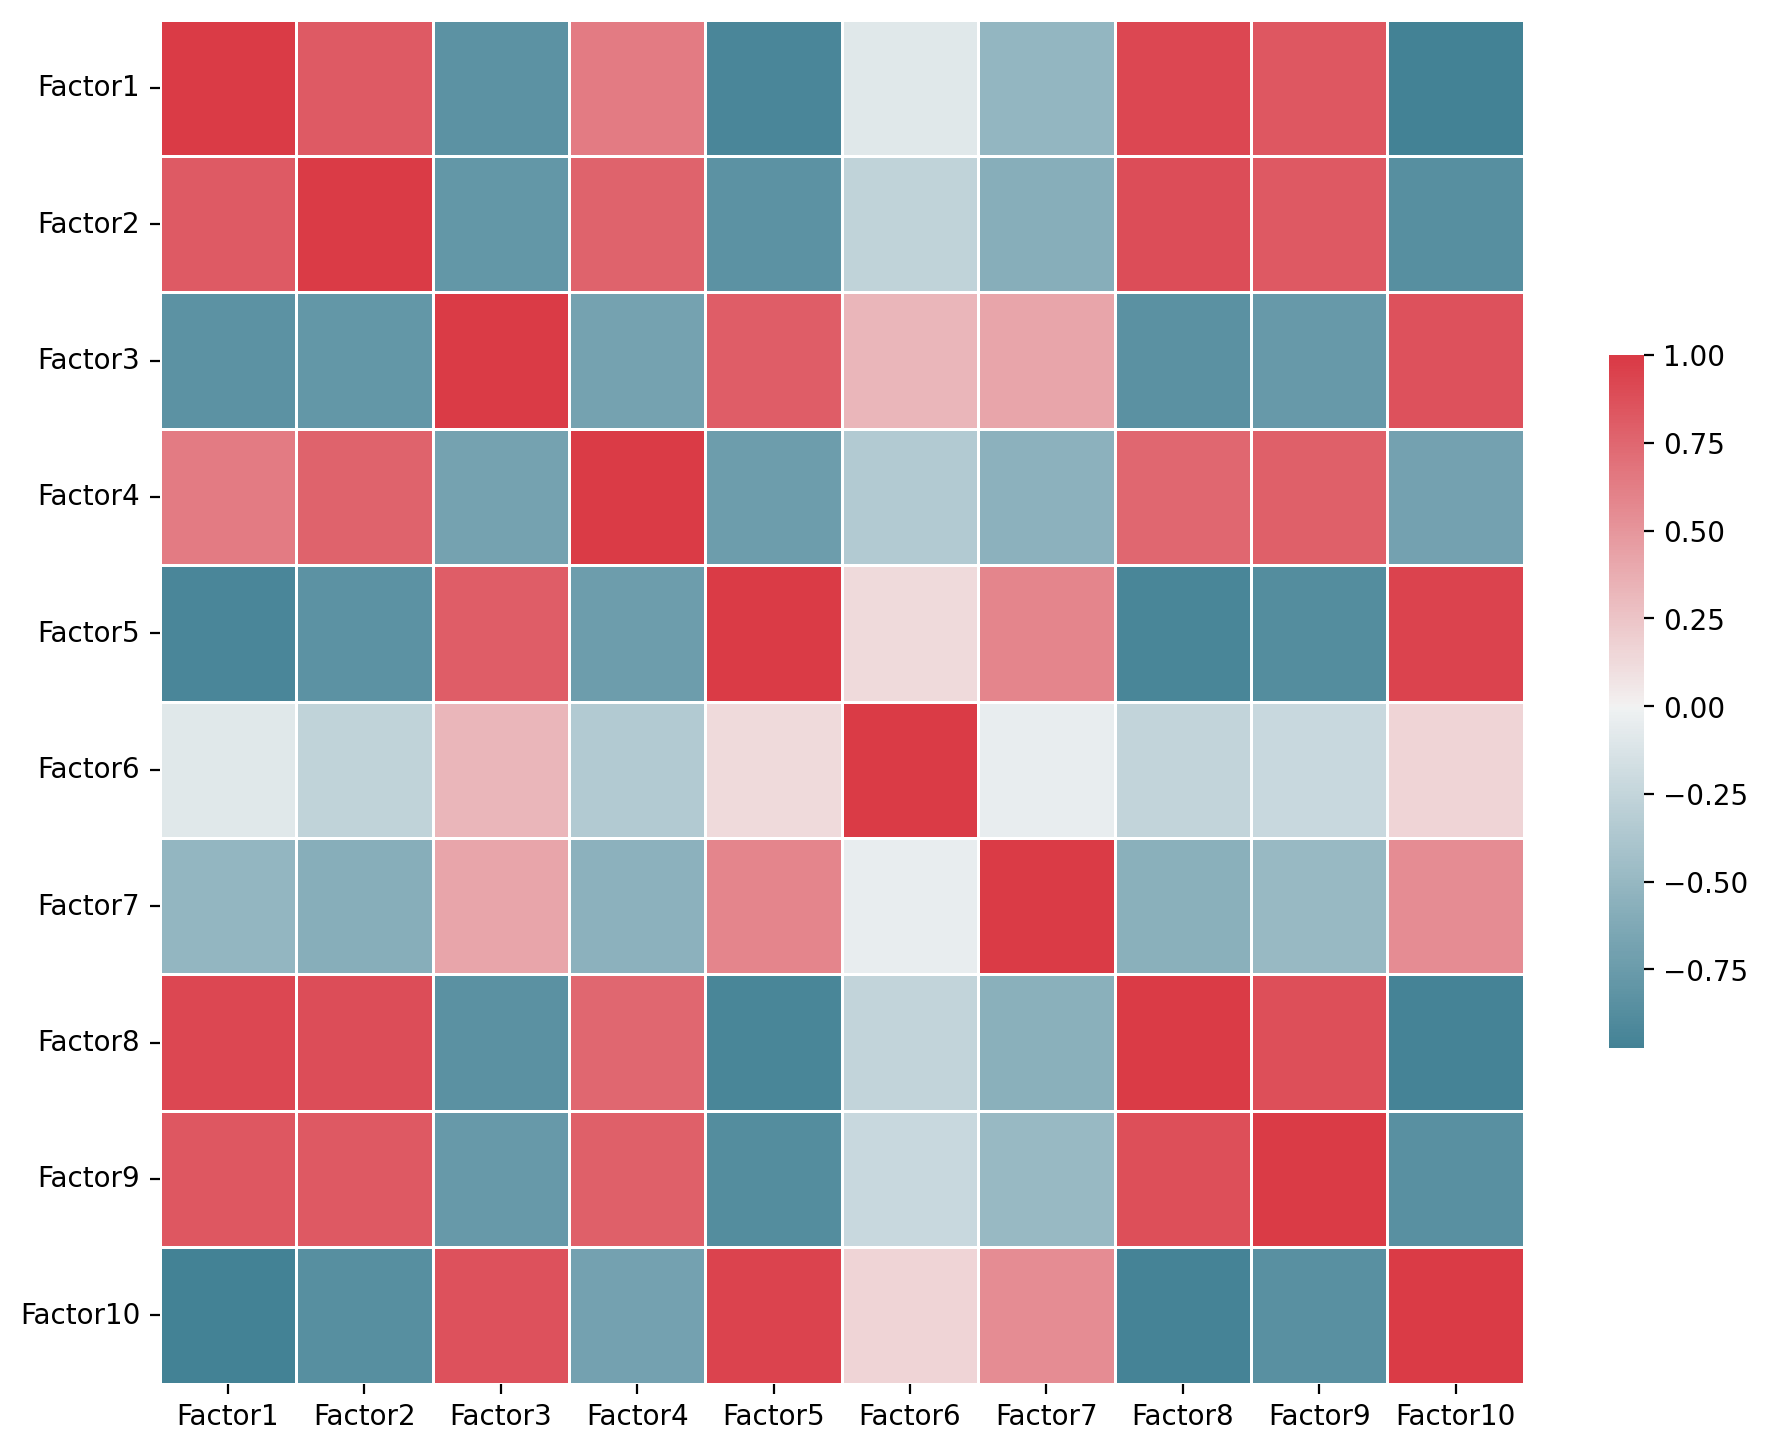

In [27]:
mfx.plot_weights_correlation(m)

<Axes: title={'center': 'group'}, xlabel='Factor1', ylabel='Factor2'>

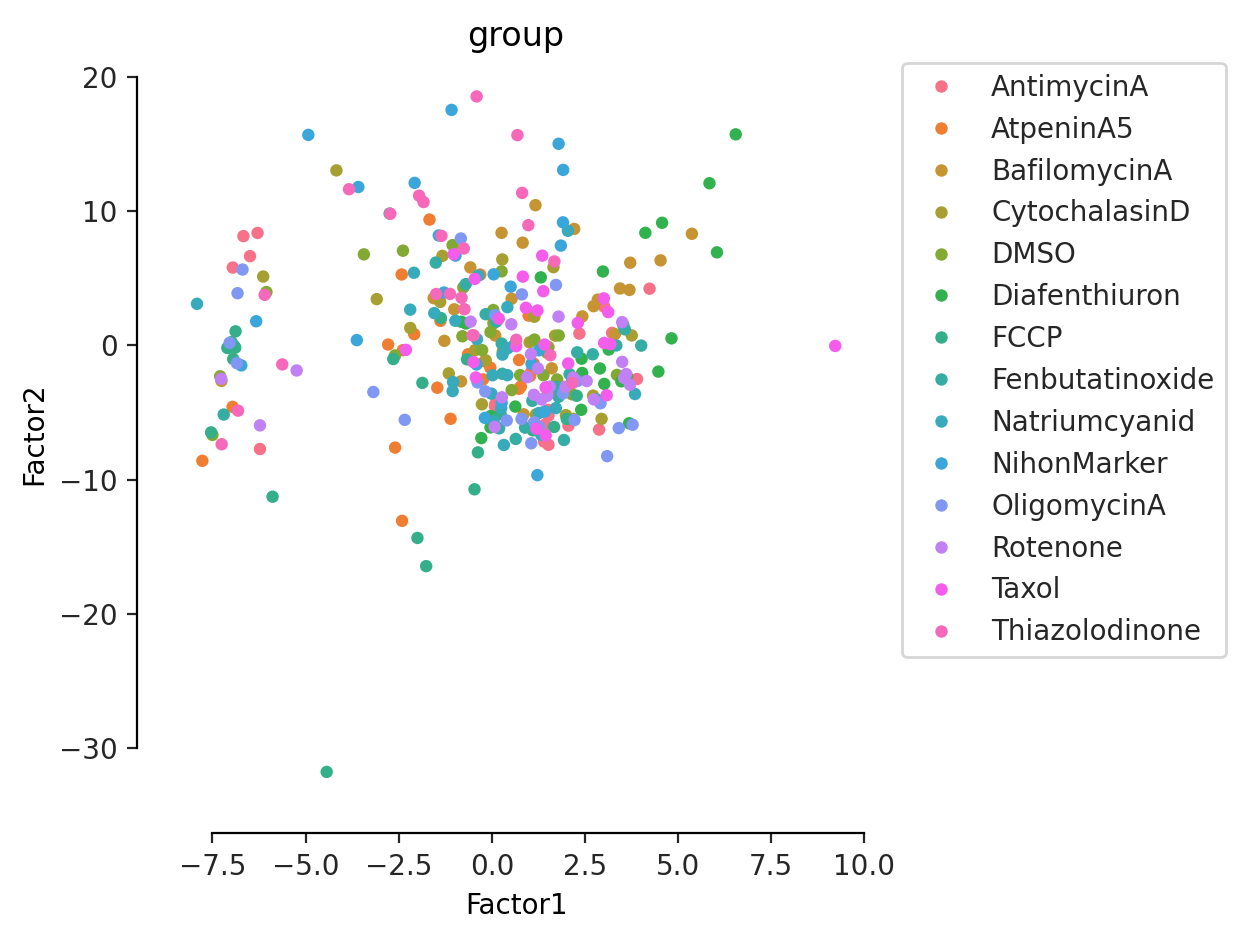

In [28]:
mfx.plot_factors(m)

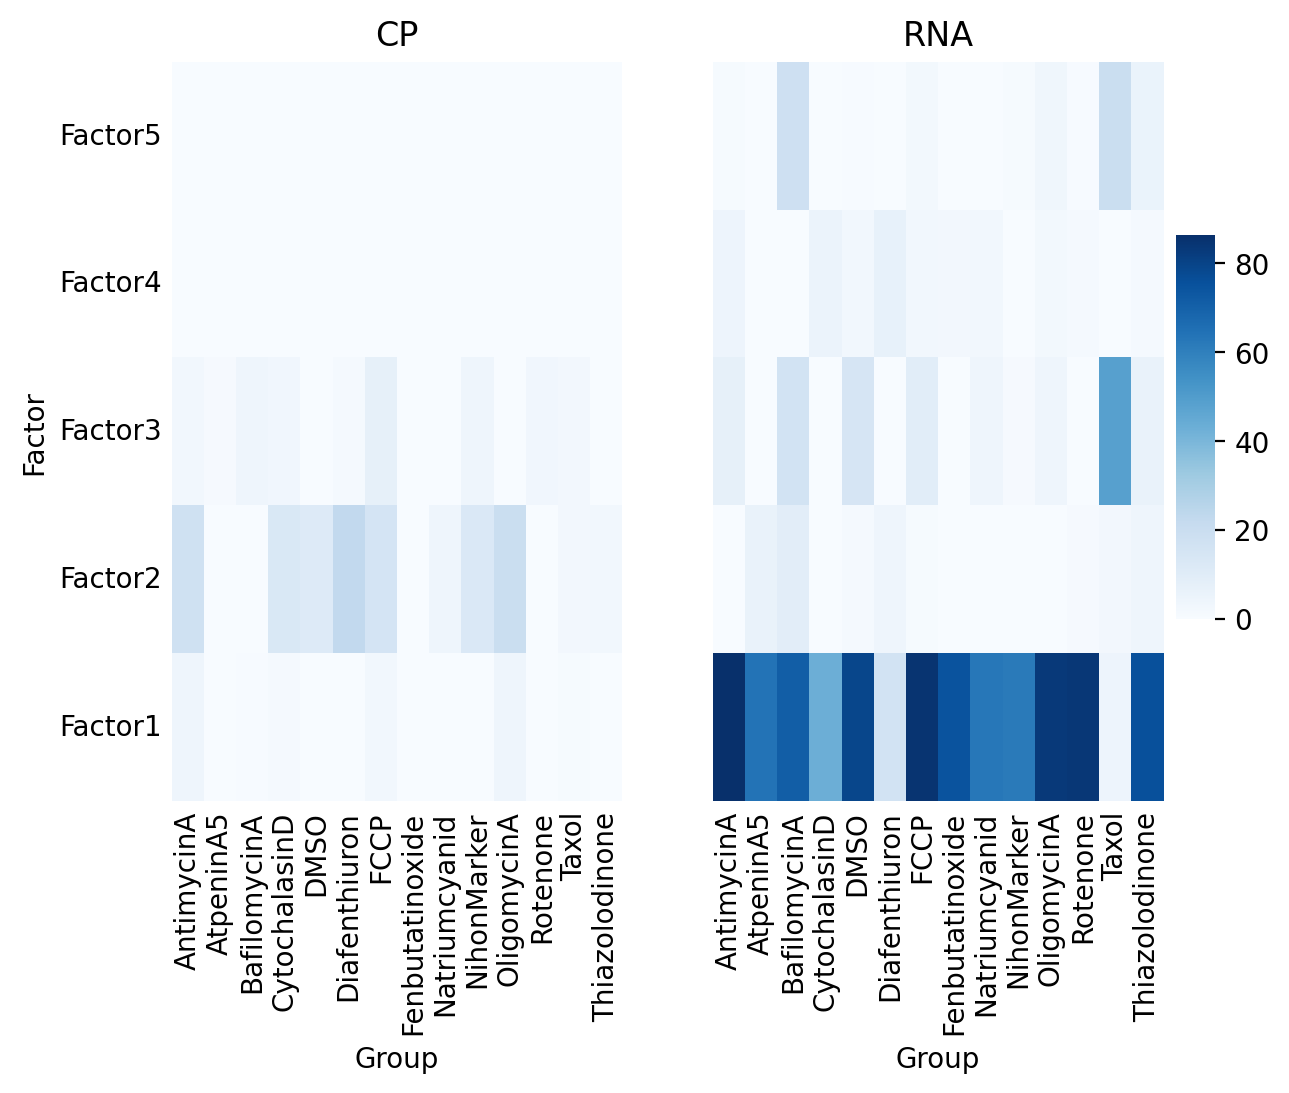

In [44]:
mfx.plot_r2(m, factors=list(range(5)), cmap="Blues")

In [30]:
m.get_r2(factors=list(range(4))).sort_values("R2", ascending=False)

,Factor,View,Group,R2
1,Factor1,RNA,AntimycinA,86.314093
1,Factor1,RNA,FCCP,84.665453
1,Factor1,RNA,Rotenone,83.707084
1,Factor1,RNA,OligomycinA,83.045790
1,Factor1,RNA,DMSO,78.960737
...,...,...,...,...
7,Factor4,RNA,AtpeninA5,-8.529823
3,Factor2,RNA,Natriumcyanid,-8.641061
3,Factor2,RNA,CytochalasinD,-9.403845
2,Factor2,CP,AtpeninA5,-11.505909


In [31]:
m
#m.metadata = m.metadata.join(df["Metadata_treatments"])
#m
m.metadata

,group
sample,
C19,AntimycinA
C20,AntimycinA
C21,AntimycinA
C22,AntimycinA
C23,AntimycinA
...,...
M20,Thiazolodinone
M21,Thiazolodinone
M22,Thiazolodinone


In [32]:
m.get_factors(factors=range(2), df=True).head()
m.get_groups()

['AntimycinA',
 'AtpeninA5',
 'BafilomycinA',
 'CytochalasinD',
 'DMSO',
 'Diafenthiuron',
 'FCCP',
 'Fenbutatinoxide',
 'Natriumcyanid',
 'NihonMarker',
 'OligomycinA',
 'Rotenone',
 'Taxol',
 'Thiazolodinone']

In [33]:
m.get_r2().head()

,Factor,View,Group,R2
0,Factor1,CP,AntimycinA,3.929525
1,Factor1,RNA,AntimycinA,86.314093
2,Factor2,CP,AntimycinA,17.637314
3,Factor2,RNA,AntimycinA,-6.828074
4,Factor3,CP,AntimycinA,2.955202


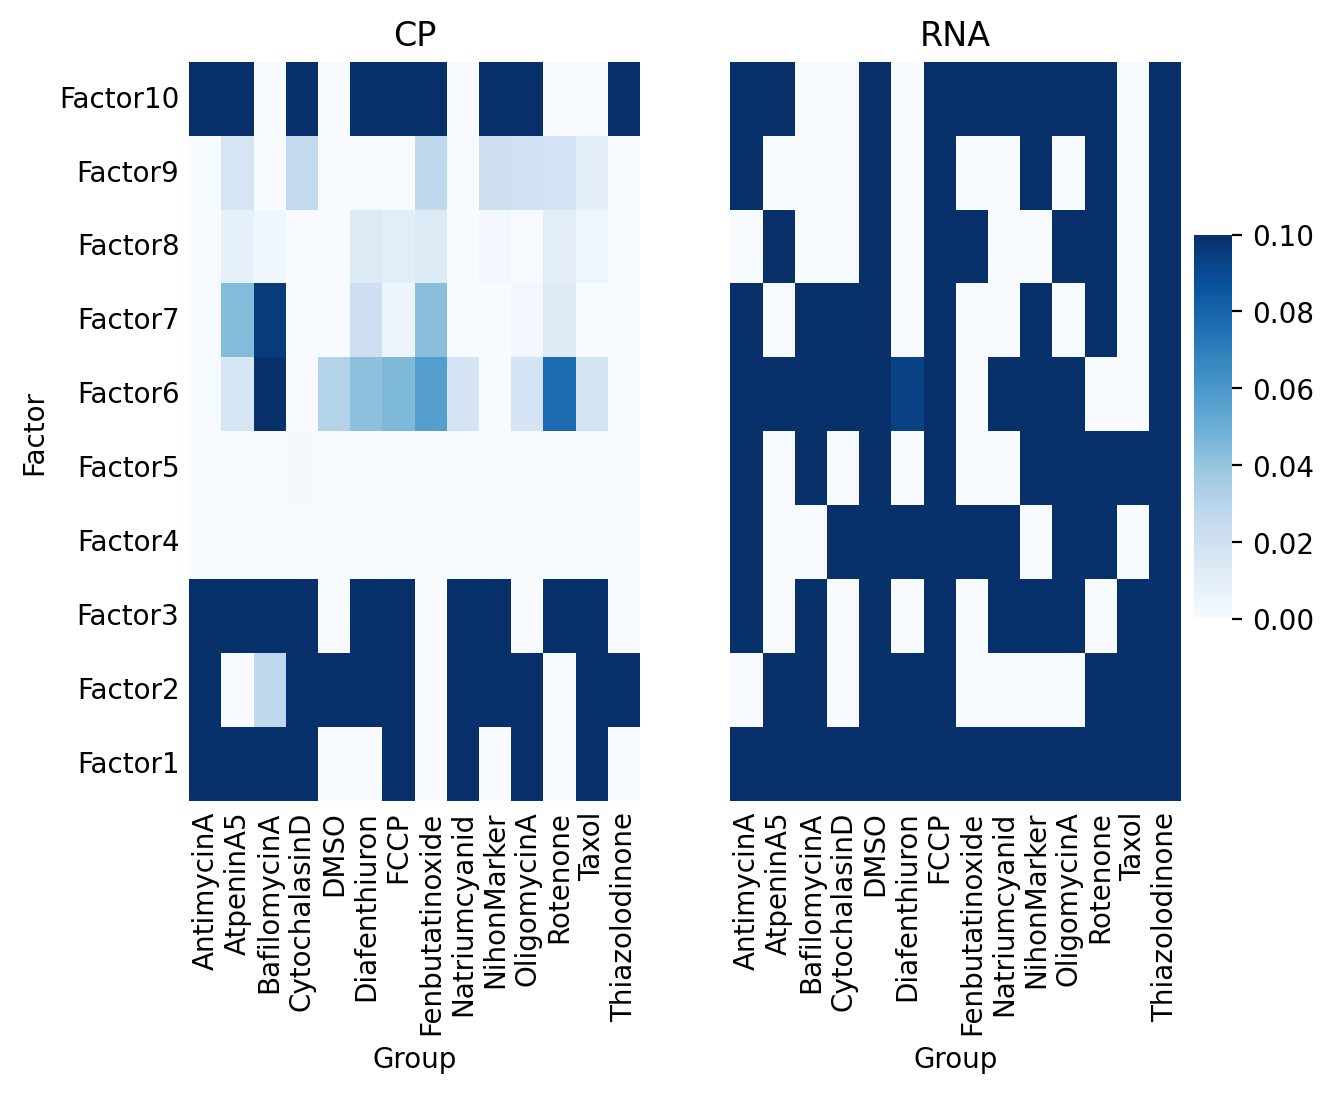

In [34]:
mfx.plot_r2(
    m,
    factors=list(range(10)), 
    cmap="Blues",
    vmax=.1,
    vmin=.0,
    #group_label="group"
)

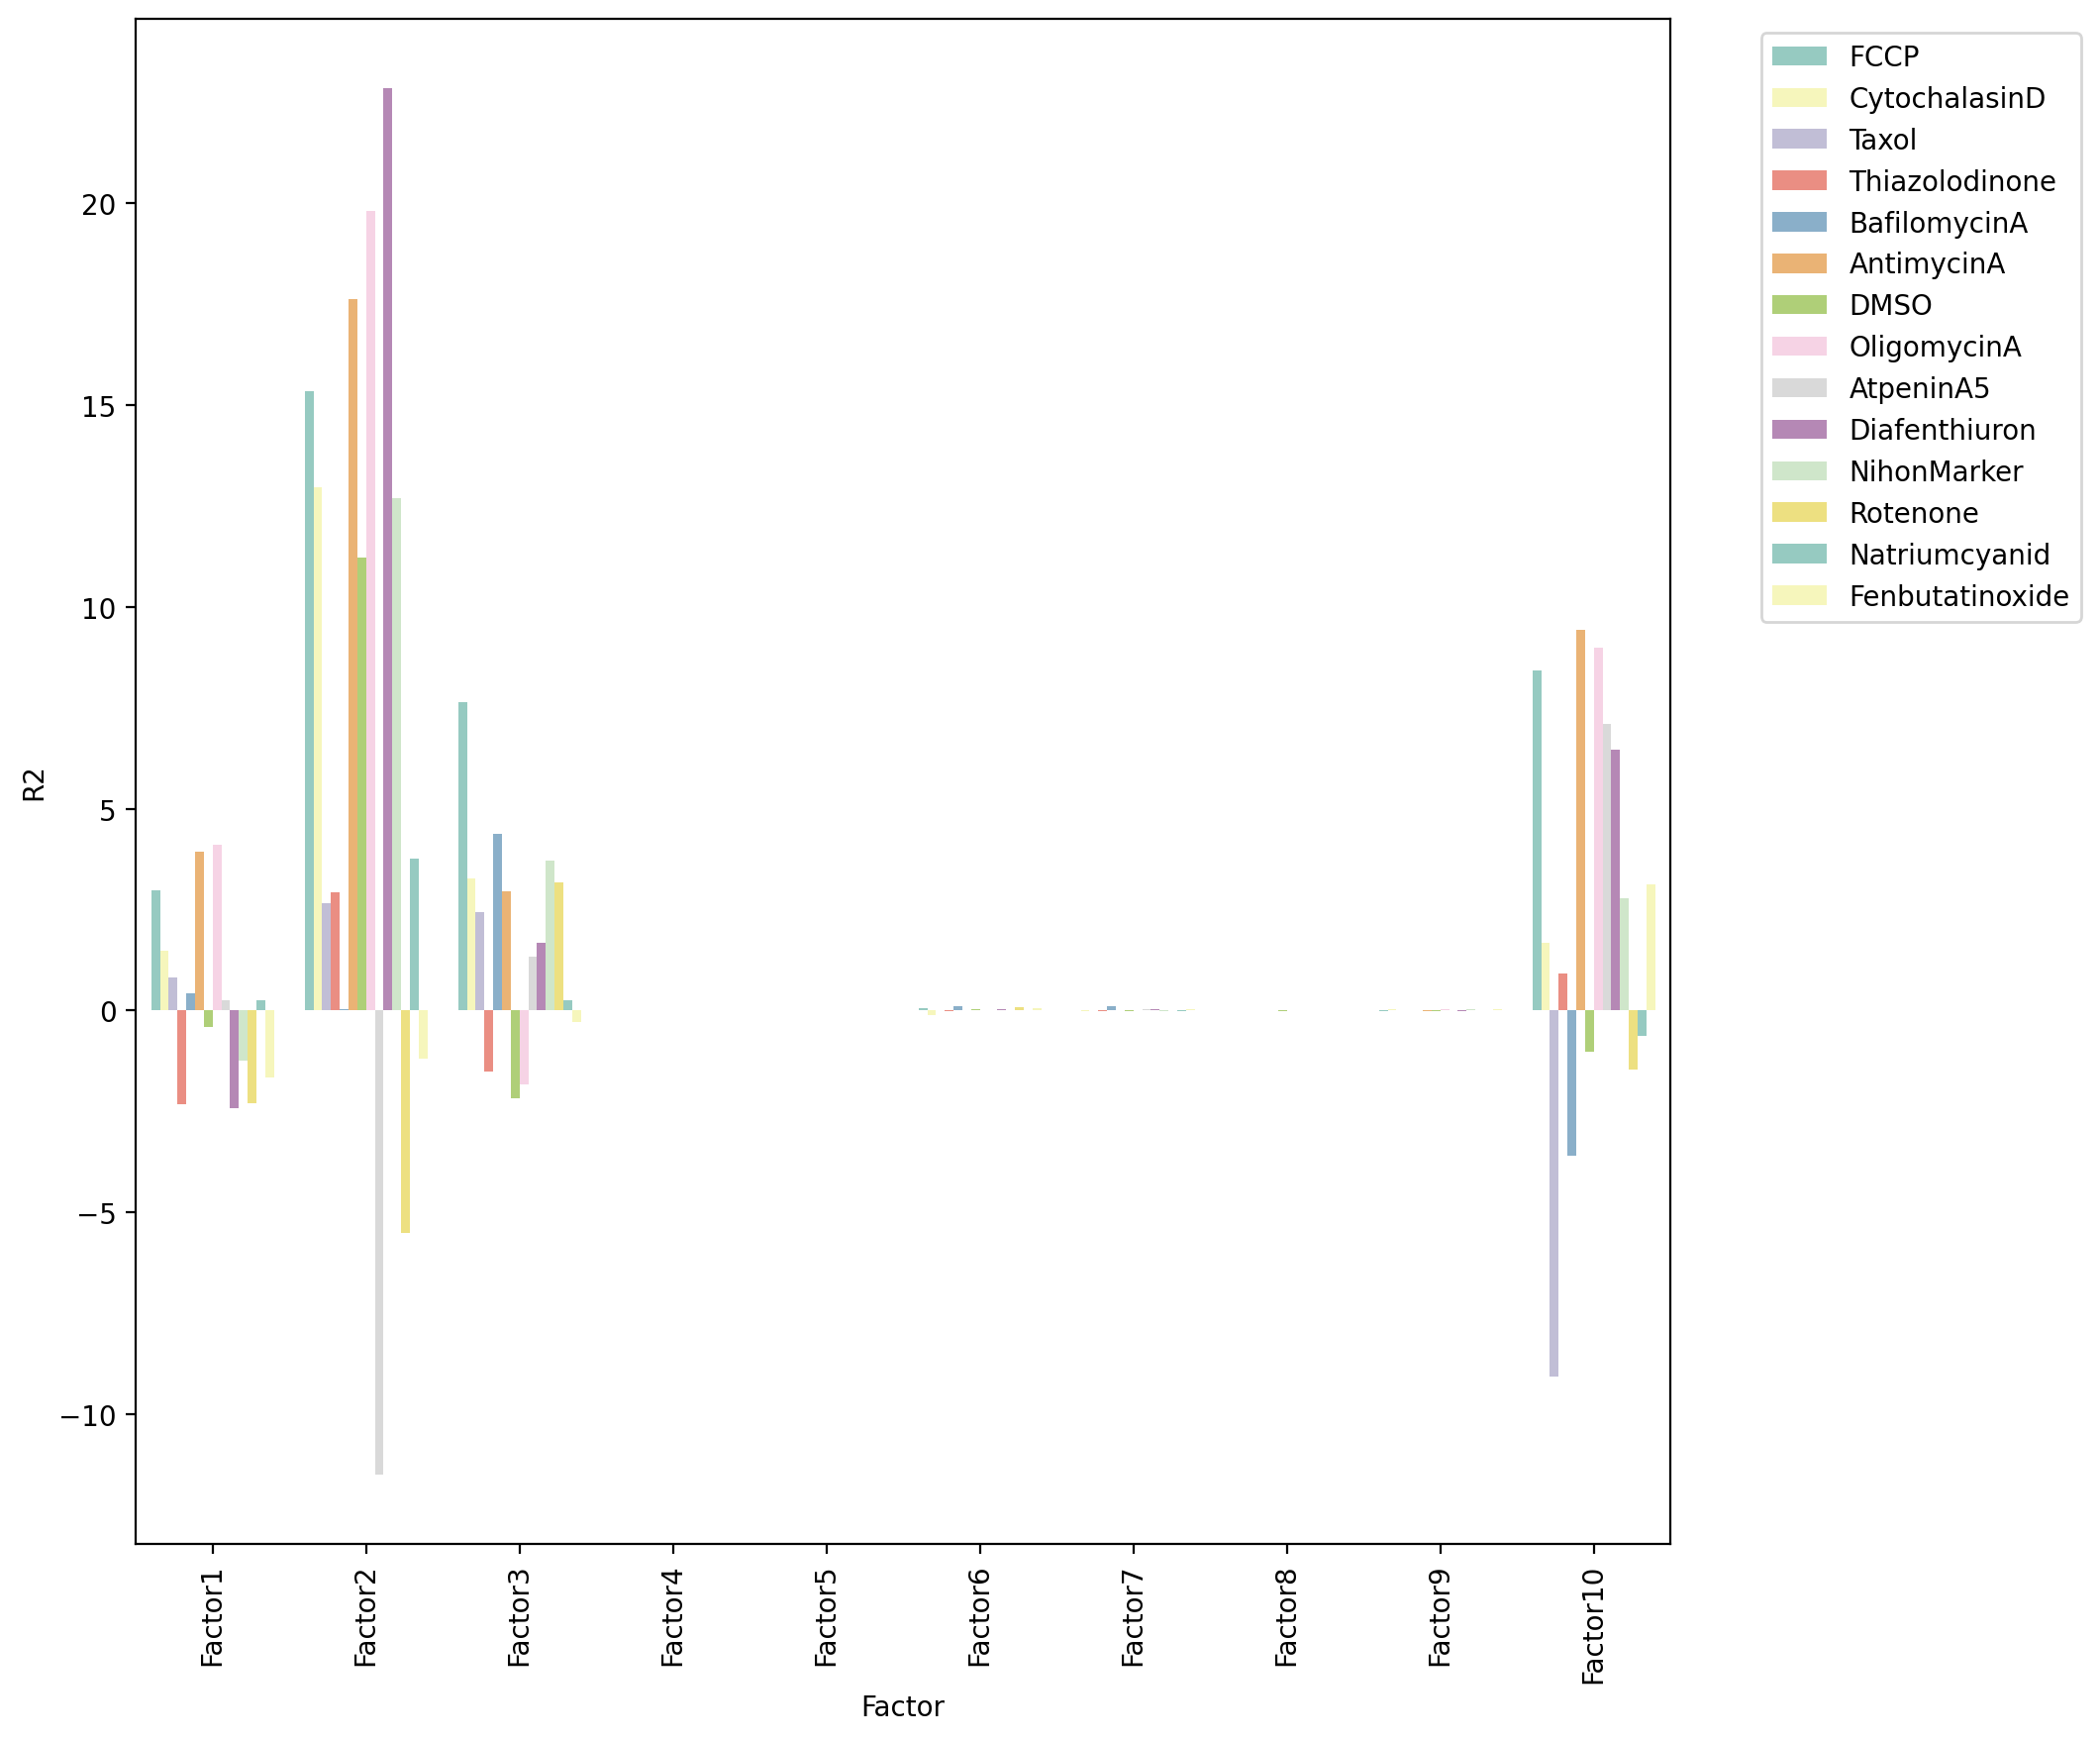

In [35]:
plt.figure(figsize=(10,10))
mfx.plot_r2_barplot(m, factors=list(range(10)), palette = "Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Axes: xlabel='Factor', ylabel='R2'>

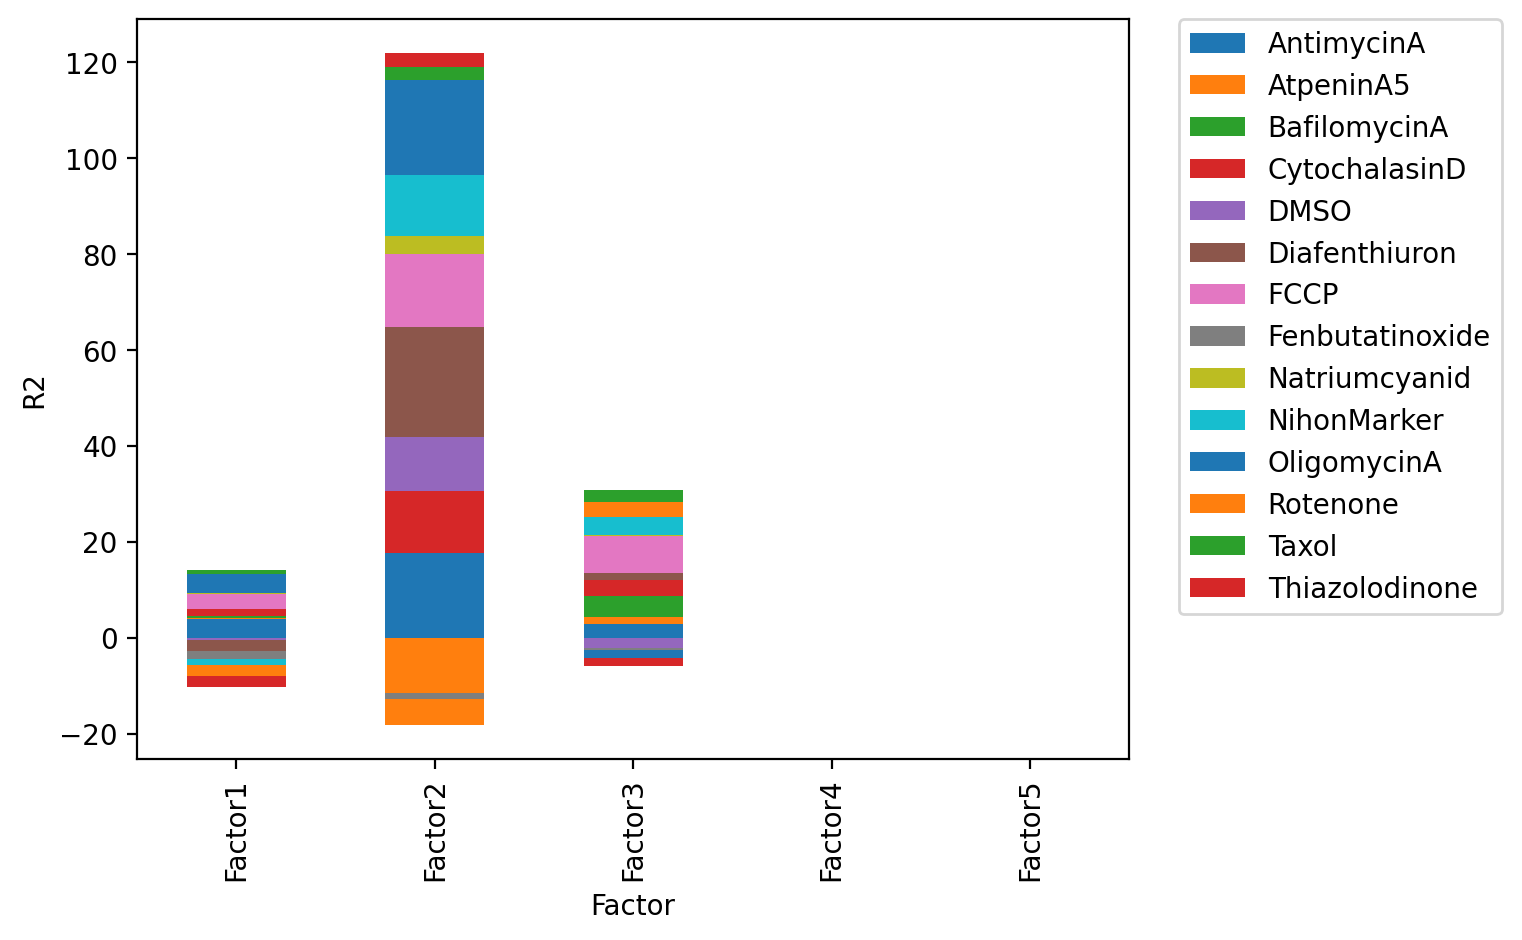

In [45]:
mfx.plot_r2_barplot(m, factors=list(range(5)), stacked=True)

In [37]:
m[m.group == "DMSO"]

AttributeError: 'mofa_model' object has no attribute 'group'

In [ ]:
print("\n".join(list(dir(m))))

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_check_factors
_check_groups
_check_views
_features_metadata
_get_factor_r2_null
_get_r2_null
_samples_metadata
calculate_variance_explained
cells
cells_metadata
close
covariates
covariates_names
data
expectations
factors
features
features_metadata
fetch_values
filename
filepath
get_cells
get_data
get_factors
get_features
get_group_kernel
get_groups
get_interpolated_factors
get_r2
get_sample_r2
get_samples
get_shape
get_top_features
get_variance_explained
get_views
get_views_contributions
get_weights
groups
interpolated_factors
likelihoods
metadata
model
nfactors
ngroups
nviews
options
project_data
run_umap
samples
samples_metadata
shape
training_opts
training_stats
views
weights


In [ ]:
m.data

<HDF5 group "/data" (2 members)>

In [ ]:
pd.DataFrame(m)

ValueError: DataFrame constructor not properly called!

<Axes: title={'center': 'group'}, xlabel='Factor1', ylabel='Factor2'>

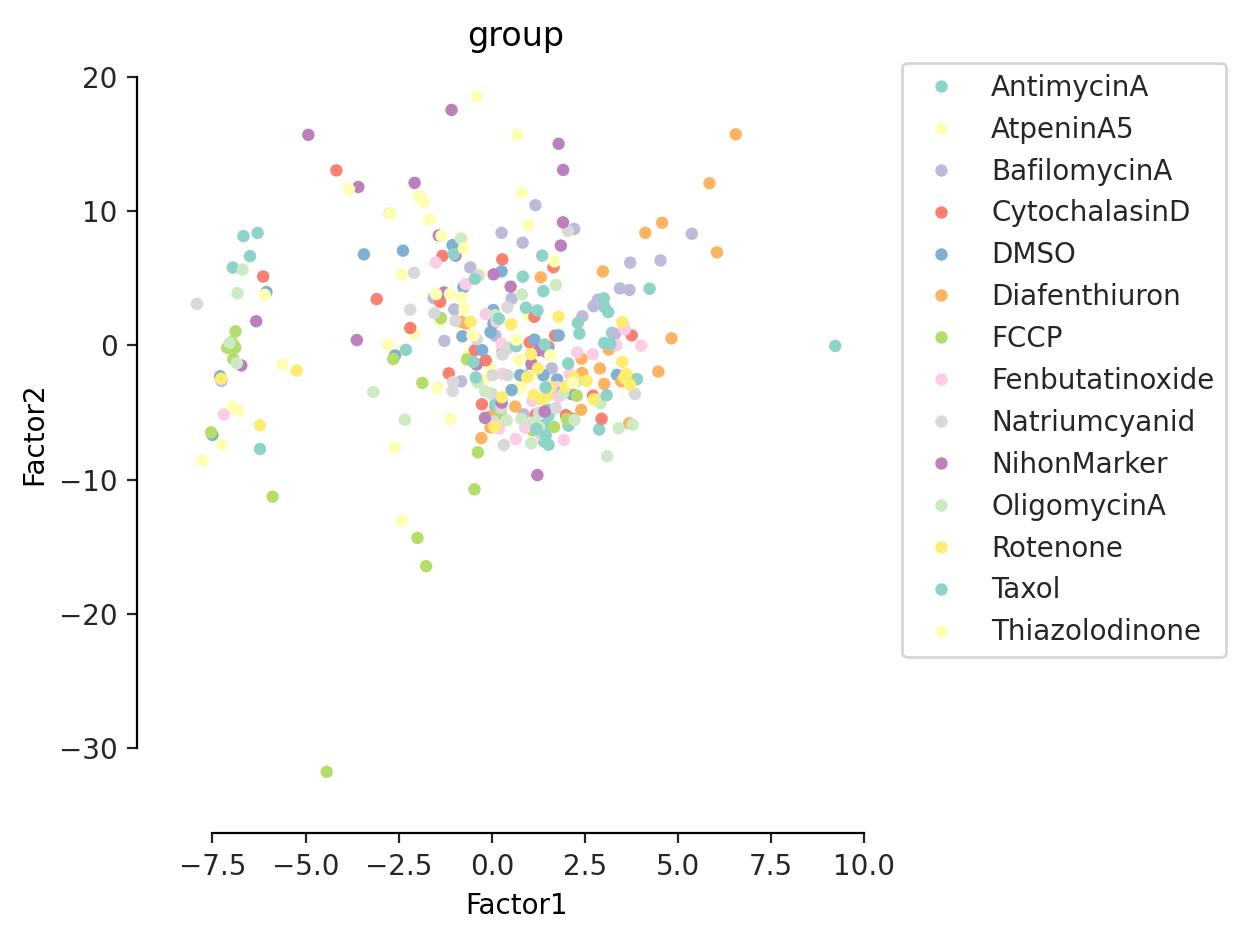

In [ ]:
mfx.plot_factors(
    m,
    #factors=list(range(5)),
    #alpha=.1,
    palette = "Set3"
    #hue="groups"
)
#ax.scatter(
#    m[m['group'] == 'DMSO'][:, 0],
#    m[m['group'] == 'DMSO'][:, 1],
#    s=30,
#    c='red',
#    marker='x',
#    label='DMSO')
#plt.title(f"{kind.upper()} plot for {data_source}")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


<Axes: title={'center': 'group'}, xlabel='Factor1', ylabel='Factor2'>

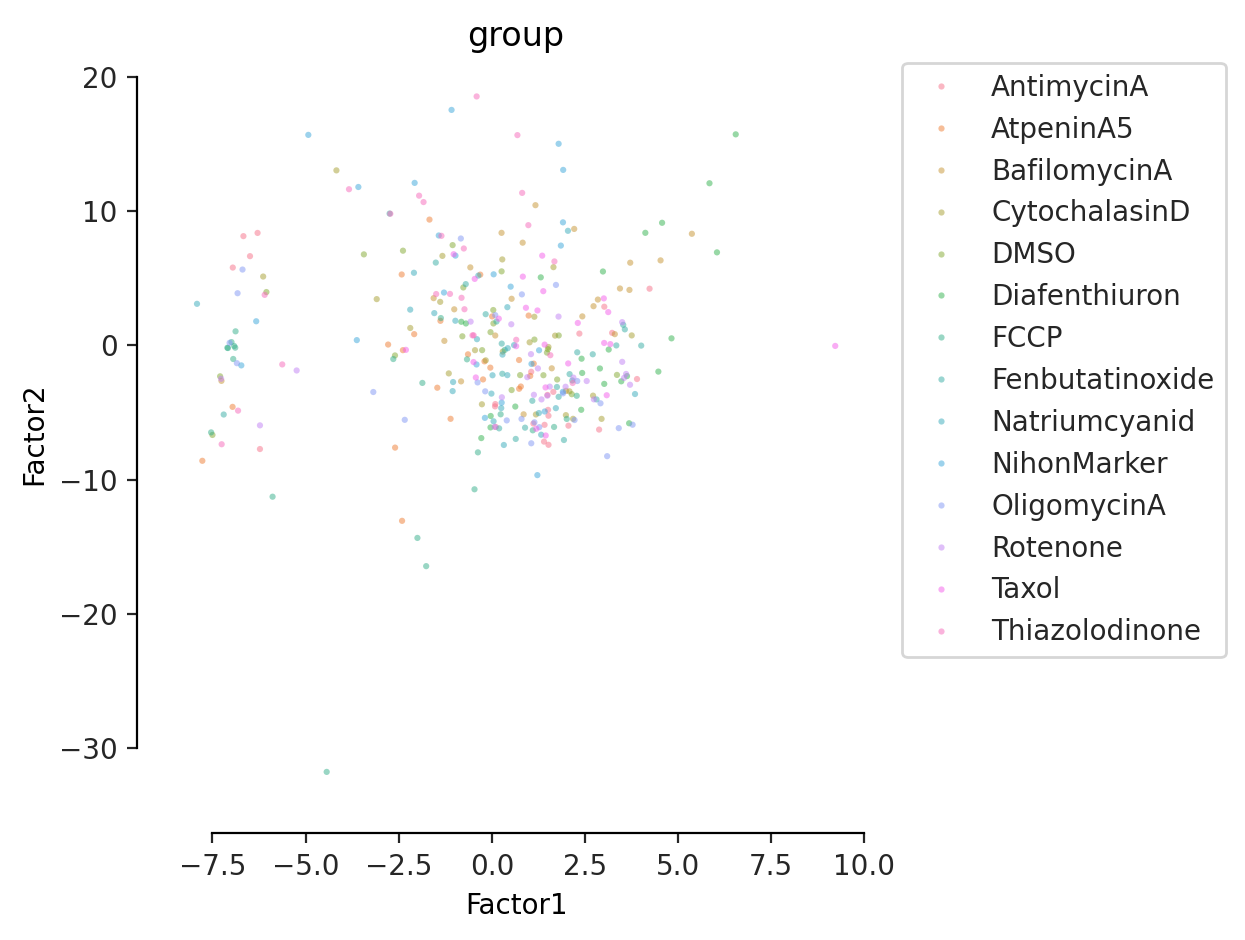

In [ ]:
mfx.plot_factors_scatter(
    m,
    x="Factor1",
    y="Factor2", 
    #kde=True,
    size=5,
    alpha=.5,
    #group_label="Metadata_treatments"
)

In [ ]:
#nf = 2  # rows/columns dimensions
#f, axarr = plt.subplots(nf, nf, figsize=(14,14))
#fnum = 0
#for i in range(nf):
#    for j in range(nf):
#        mfx.plot_factors_scatter(
#            m,
#            x=fnum,
#            y=fnum+1,
#            size=5,
#            alpha=.5, 
#            legend='brief',
#            ax=axarr[i][j])
#        fnum+=2

In [ ]:
m.metadata

,group
sample,
C19,AntimycinA
C20,AntimycinA
C21,AntimycinA
C22,AntimycinA
C23,AntimycinA
...,...
M20,Thiazolodinone
M21,Thiazolodinone
M22,Thiazolodinone


Text(0.5, 1.0, 'Pearson r')

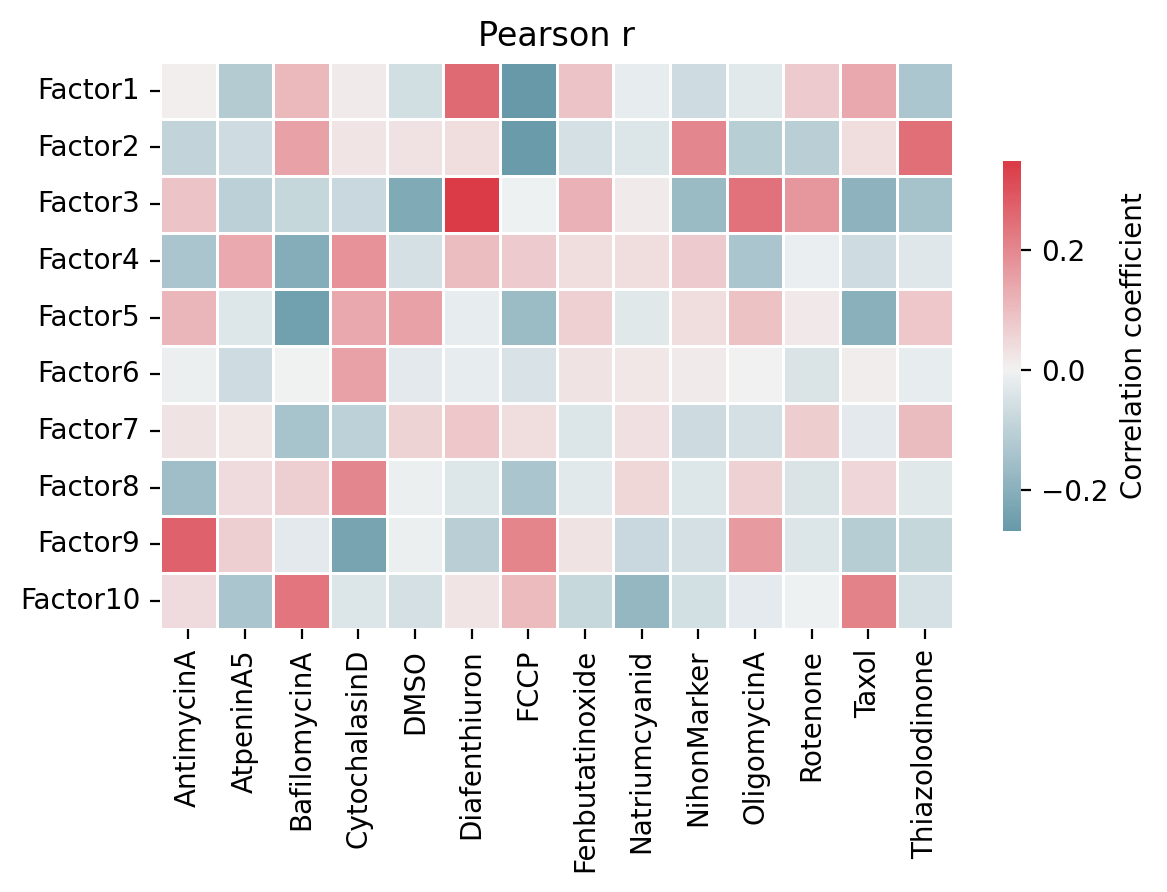

In [ ]:
mfx.plot_factors_covariates_correlation(m, covariates=pd.get_dummies(m.metadata.group)); plt.title("Pearson r")

<Axes: >

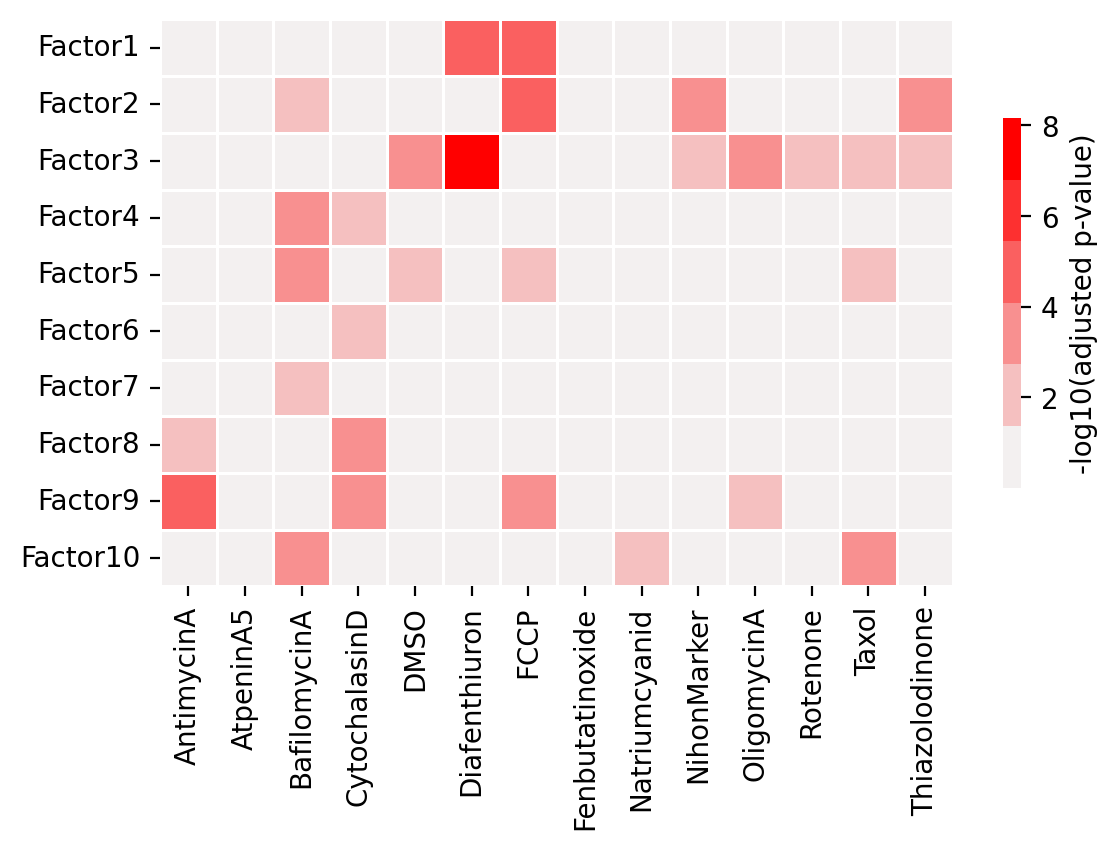

In [ ]:
mfx.plot_factors_covariates_correlation(m, covariates=pd.get_dummies(m.metadata.group), pvalues=True, cmap=sns.light_palette("#FF0000"))